# EDA Exercise

To see a completed version of this exercise, refer to [`examples/eda-exercise`](https://datasci.rice.edu/deep/curriculum/examples/eda-exercise/).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d

%matplotlib inline

In [2]:
plt.style.use('seaborn')
plt.rcParams["figure.figsize"] = 10, 6
plt.rcParams["figure.dpi"] = 150

In [3]:
# https://www.cftc.gov/MarketReports/CommitmentsofTraders/HistoricalCompressed/index.htm
import requests, zipfile, io
import os.path

if not os.path.exists("../data/F_Disagg06_16.txt"):
    url = "https://www.cftc.gov/files/dea/history/fut_disagg_txt_hist_2006_2016.zip"

    r = requests.get(url)
    z = zipfile.ZipFile(io.BytesIO(r.content))
    z.extractall("../data")

In [4]:
# low_memory=False suppresses a mixed-type warning that can arise w/ messy data. We're not worried about performance right now, so not a big deal.
df = pd.read_csv("../data/F_Disagg06_16.txt", low_memory=False)
df.head()

Market_and_Exchange_Names  As_of_Date_In_Form_YYMMDD  \
0  WHEAT-SRW - CHICAGO BOARD OF TRADE                     161227   
1  WHEAT-SRW - CHICAGO BOARD OF TRADE                     161220   
2  WHEAT-SRW - CHICAGO BOARD OF TRADE                     161213   
3  WHEAT-SRW - CHICAGO BOARD OF TRADE                     161206   
4  WHEAT-SRW - CHICAGO BOARD OF TRADE                     161129   

  Report_Date_as_YYYY-MM-DD CFTC_Contract_Market_Code CFTC_Market_Code  \
0                2016-12-27                    001602             CBT    
1                2016-12-20                    001602             CBT    
2                2016-12-13                    001602             CBT    
3                2016-12-06                    001602             CBT    
4                2016-11-29                    001602             CBT    

   CFTC_Region_Code  CFTC_Commodity_Code  Open_Interest_All  \
0                 0                    1             446777   
1                 0                    1             447386   
2                 0                    1             443306   
3                 0                    1             436214   
4                 0                    1             444341   

   Prod_Merc_Positions_Long_All  Prod_Merc_Positions_Short_All  ...  \
0                         77925                          75382  ...   
1                         76390                          70886  ...   
2                         72600                          76785  ...   
3                         77532                          61394  ...   
4                         77239                          63334  ...   

   Conc_Net_LE_4_TDR_Long_Other  Conc_Net_LE_4_TDR_Short_Other  \
0                          23.7                           18.5   
1                          23.9                           17.4   
2                          24.6                           17.3   
3                          26.8                           17.9   
4                          29.1                           16.2   

   Conc_Net_LE_8_TDR_Long_Other  Conc_Net_LE_8_TDR_Short_Other  \
0                          35.4                           29.0   
1                          35.1                           28.0   
2                          34.8                           27.6   
3                          38.8                           28.9   
4                          39.5                           27.3   

                 Contract_Units  CFTC_Contract_Market_Code_Quotes  \
0  (CONTRACTS OF 5,000 BUSHELS)                            001602   
1  (CONTRACTS OF 5,000 BUSHELS)                            001602   
2  (CONTRACTS OF 5,000 BUSHELS)                            001602   
3  (CONTRACTS OF 5,000 BUSHELS)                            001602   
4  (CONTRACTS OF 5,000 BUSHELS)                            001602   

   CFTC_Market_Code_Quotes  CFTC_Commodity_Code_Quotes  CFTC_SubGroup_Code  \
0                     CBT                            1                 A10   
1                     CBT                            1                 A10   
2                     CBT                            1                 A10   
3                     CBT                            1                 A10   
4                     CBT                            1                 A10   

   FutOnly_or_Combined  
0              FutOnly  
1              FutOnly  
2              FutOnly  
3              FutOnly  
4              FutOnly  

[5 rows x 191 columns]

## Structured EDA

### What features are in your dataset?

List of Columns:
https://www.cftc.gov/MarketReports/CommitmentsofTraders/HistoricalViewable/CFTC_023168.html

In [5]:
df.columns

Index(['Market_and_Exchange_Names', 'As_of_Date_In_Form_YYMMDD',
       'Report_Date_as_YYYY-MM-DD', 'CFTC_Contract_Market_Code',
       'CFTC_Market_Code', 'CFTC_Region_Code', 'CFTC_Commodity_Code',
       'Open_Interest_All', 'Prod_Merc_Positions_Long_All',
       'Prod_Merc_Positions_Short_All',
       ...
       'Conc_Net_LE_4_TDR_Long_Other', 'Conc_Net_LE_4_TDR_Short_Other',
       'Conc_Net_LE_8_TDR_Long_Other', 'Conc_Net_LE_8_TDR_Short_Other',
       'Contract_Units', 'CFTC_Contract_Market_Code_Quotes',
       'CFTC_Market_Code_Quotes', 'CFTC_Commodity_Code_Quotes',
       'CFTC_SubGroup_Code', 'FutOnly_or_Combined'],
      dtype='object', length=191)

Note that the dataset is in a "wide" format, as there are related fields that have values in the column name, e.g. "Conc...4" vs "Conc...8".  More info on data organization:  

* https://en.wikipedia.org/wiki/Wide_and_narrow_data
* https://vita.had.co.nz/papers/tidy-data.pdf

The most important columns seem to be the first several that appear, described as follows:
- **Market_and_Exchange_Names**: The name of the market & exchange of the good.
- **Report_Date_as_YYYY-MM-DD**: The date of the reported data
- **CFTC_Contract_Market_Code**: A code for a specific contract market
- **CFTC_Market_Code**: A code for a specific market (like CBT)
- **CFTC_Region_Code**: A code for the region of the market
- **CFTC_Commodity_Code**: A code (assigned by each market) for the commodity
- **Open_Interest_All**: The number of contracts that are still outstanding (have not expired or been fulfilled)

### What type is each feature?

In [6]:
df.dtypes

Market_and_Exchange_Names            object
As_of_Date_In_Form_YYMMDD             int64
Report_Date_as_YYYY-MM-DD            object
CFTC_Contract_Market_Code            object
CFTC_Market_Code                     object
CFTC_Region_Code                      int64
CFTC_Commodity_Code                   int64
Open_Interest_All                     int64
Prod_Merc_Positions_Long_All          int64
Prod_Merc_Positions_Short_All         int64
Swap_Positions_Long_All               int64
Swap__Positions_Short_All             int64
Swap__Positions_Spread_All            int64
M_Money_Positions_Long_All            int64
M_Money_Positions_Short_All           int64
M_Money_Positions_Spread_All          int64
Other_Rept_Positions_Long_All         int64
Other_Rept_Positions_Short_All        int64
Other_Rept_Positions_Spread_All       int64
Tot_Rept_Positions_Long_All           int64
Tot_Rept_Positions_Short_All          int64
NonRept_Positions_Long_All            int64
NonRept_Positions_Short_All     

### Distribution of each feature?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11b35a160>]],
      dtype=object)

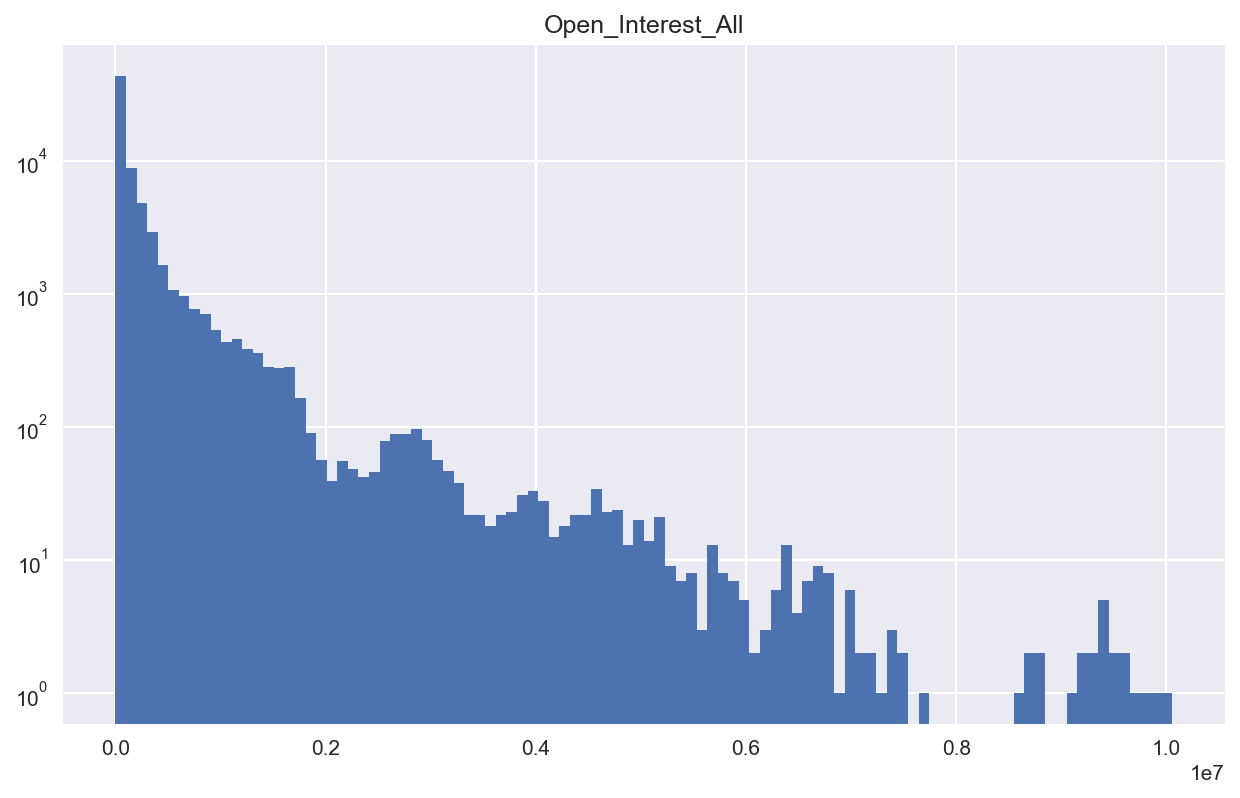

In [7]:
# Distribution of open interest accross all markets, all contracts
df.hist(column='Open_Interest_All', bins=100, log=True)

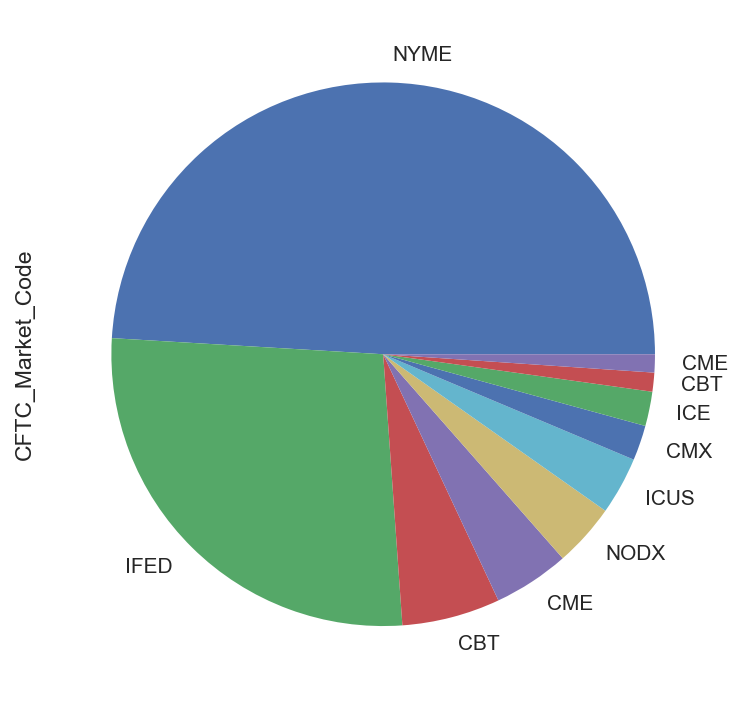

In [8]:
# Top 10 Markets in terms of reported data count
df['CFTC_Market_Code'].value_counts()[:10].plot.pie()

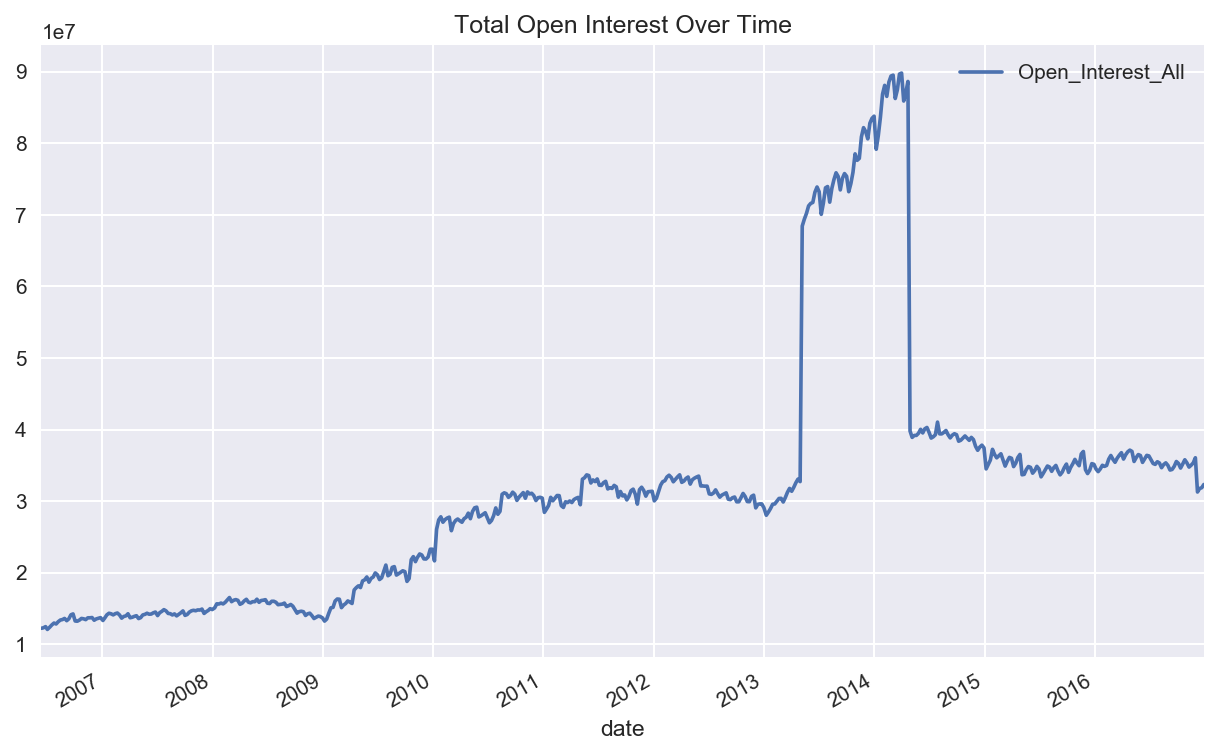

In [9]:
df['date'] = pd.to_datetime(df['Report_Date_as_YYYY-MM-DD'])
df = df.sort_values('date')
date_groups = df.groupby('date')
date_groups['Open_Interest_All'].sum().plot(title="Total Open Interest Over Time",legend=True)

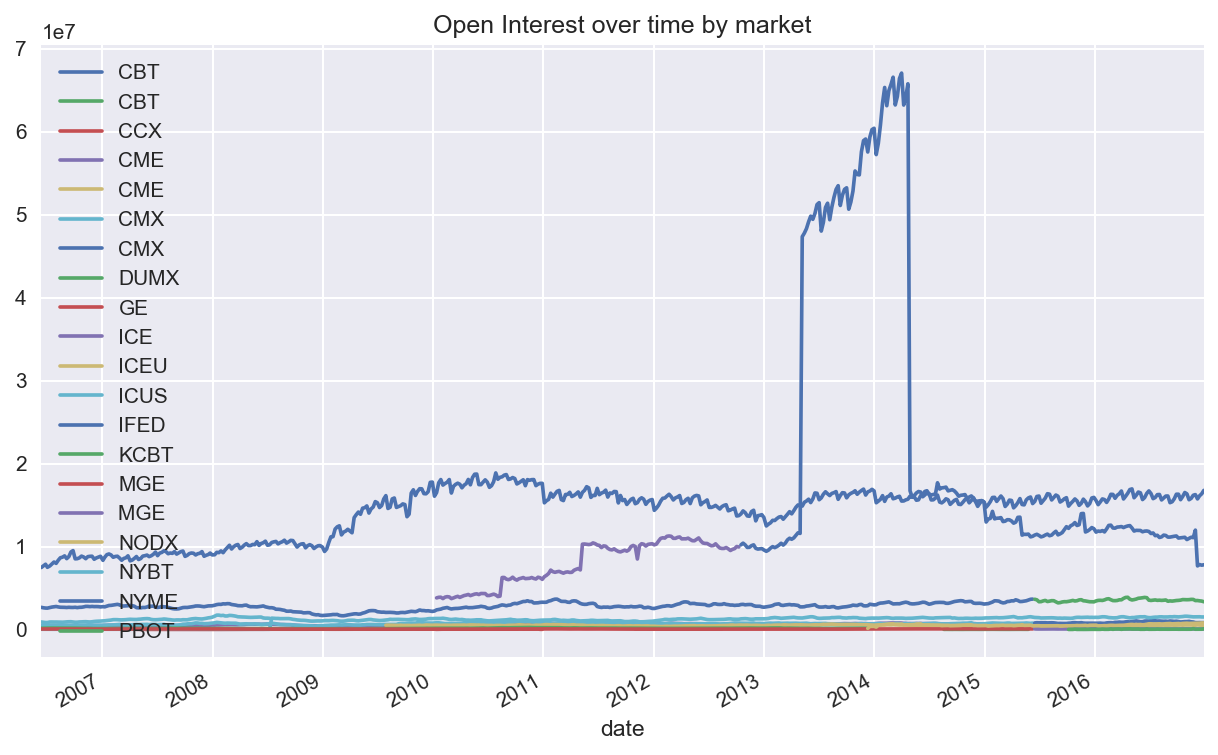

In [10]:
# Plot by market
market_groups = df.groupby(['CFTC_Market_Code','date'])['Open_Interest_All'].sum().reset_index('date')
for market in market_groups.index.unique():
    ax = market_groups.loc[market].plot(title='Open Interest over time by market', x='date', y='Open_Interest_All', 
                               ax=plt.gca(), label=market)

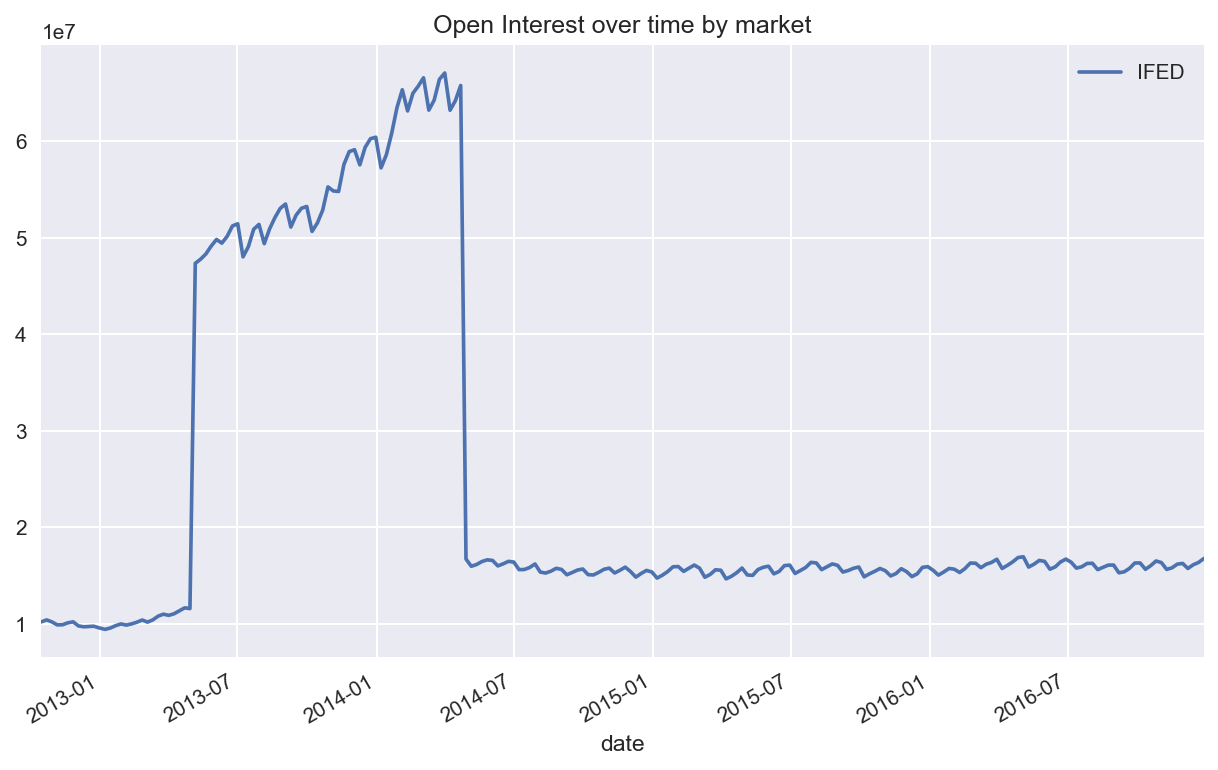

In [11]:
# Show IFED by itself with temporarily wildly different data
market = 'IFED'
market_groups.loc[market].plot(title='Open Interest over time by market', x='date', y='Open_Interest_All', label=market)

In [12]:
# Top Commodities In Terms of Report Count
df['Market_and_Exchange_Names'].str.split(' - ').str[0].value_counts()

WHEAT                                         1190
CRUDE OIL, LIGHT SWEET                         795
SOYBEAN OIL                                    551
LEAN HOGS                                      551
SUGAR NO. 11                                   551
ROUGH RICE                                     551
SOYBEAN MEAL                                   551
COTTON NO. 2                                   551
PALLADIUM                                      551
MILK, Class III                                551
CORN                                           551
HENRY HUB PENULTIMATE GAS SWAP                 551
COPPER-GRADE #1                                551
LIVE CATTLE                                    551
OATS                                           551
NATURAL GAS                                    551
RANDOM LENGTH LUMBER                           551
COFFEE C                                       551
PLATINUM                                       551
SOYBEANS                       

### What do the numeric features represent? Counts? Measurements?
Open_Interest_All is a count of standing contracts

### What are the pairwise relationships between numeric features?
Open_Interest_All is a total amount that is further broken down by who owns the contract and long/short. For example:
- Prod_Merc_Positions_Long(/Short)_All
- Swap_Positions_Long_All(/Short)_All
- M_Money_Positions_Long(/Short)_All
- Other_Rept_Positions_Long(/Short)_All

## Brainstorming
A significant majority of the data is from three markets:
1. NYME: New York Mercantile Exchange
2. IFED: ICE Futures U.S. Energy Division
3. CBT: Chicago Board of Trade
This order was surprising to see because I thought CBT was the largest commodities exchange, but at least in terms of the raw volume of data we have on each that doesn't appear to be true.

Also the graph of open interest shows a period of time from 2013-2014 with a large sudden increase in open interest, which then suddenly drops off. That will need to be explained/understood at some point.

We chose this dataset to learn about finance and the futures market. It seems like looking at open interest will be the most interesting way to go, particularly looking at open interest over time, in different markets/regions, and for different commodities or types of commodities will be the most interesting.

# Investigate Prod/Merc vs. Money Manager vs. Other

### Question 1: What are the different subgroups, and what do they mean?

In [13]:
# Show subgroups
df['CFTC_SubGroup_Code'].value_counts()

N16    22098
N13    15957
N10    15947
A10     3307
N20     2382
A50     2204
A30     1972
A20     1697
A25     1522
N60     1245
N25      756
N30      551
A40      551
N70       10
Name: CFTC_SubGroup_Code, dtype: int64

In [14]:
for subgroup_code in sorted(df['CFTC_SubGroup_Code'].unique()):
    subgroup_reports = df[df['CFTC_SubGroup_Code'] == subgroup_code]
    market_exchange_sample = subgroup_reports['Market_and_Exchange_Names'].str.split(' - ').str[0].unique()
    print(subgroup_code + ':  ', ', '.join(market_exchange_sample)[:100])

A10:   WHEAT, ROUGH RICE, CORN, OATS, MINI CORN, WHEAT-HRW, WHEAT-SRW, WHEAT-HRSpring
A20:   LIVE CATTLE, FRZN PORK BELLIES, LEAN HOGS, FEEDER CATTLE
A25:   MILK, Class III, BUTTER (CASH SETTLED), CME MILK IV, DRY WHEY, CHEESE (CASH-SETTLED), NON FAT DRY MI
A30:   SOYBEAN MEAL, SOYBEANS, MINI SOYBEANS, SOYBEAN OIL
A40:   COTTON NO. 2
A50:   FRZN CONCENTRATED ORANGE JUICE, SUGAR NO. 11, COFFEE C, COCOA
N10:   NO. 2 HEATING OIL, N.Y. HARBOR, CRUDE OIL, LIGHT SWEET, E-MINI CRUDE OIL, LIGHT SWEET, NY RES FUEL 1
N13:   DOMINION BASIS SWAP, WAHA BASIS SWAP, HOUSTON SHIP CH BASIS SWAP, CIG ROCKIES BASIS SWAP, NW PIPE RO
N16:   PJM CAL MONTH OFF PK LMP SWAP, NYISO ZONE J LBMP SWAP, NYISO ZONE G LBMP SWAP, NYISO ZONE A LBMP SWA
N20:   PALLADIUM, GOLD, PLATINUM, COPPER-GRADE #1, SILVER
N25:   COPPER-GRADE #1, HOT ROLLED COIL STEEL, IRON ORE 62% FE, CFR CHINA TSI, ALUMINUM MW US TR PLATTS SWA
N30:   RANDOM LENGTH LUMBER
N60:   SULFUR FINANCIAL INSTRUMENT, CARBON FINANCIAL INSTRUMENT, RGGI CO2 ALL

#### How does open interest for different contract holders vary over time for each commodity subgroup?
Note: contract holders are Producers/Merchants, Swap dealers (banks/hedge funds), and Other

In [15]:
def plot_interest_by_buyer_type(df, subgroup_code=None):
    """
    Plot the (long) open interest for Producers/Merchants vs. Swap vs. M_Money vs. Other
    over time
    
    Arguments:
        df: the data to plot
        subgroup_code: optional argument of the subgroup code (ex: A10) of the group to plot.
            if this argument is not given, all subgroups will be aggregated and plotted
    """
    df = df[df['CFTC_Market_Code'] != 'IFED'] # Exclude IFED b/c of anomaly
    subgroup = df[df['CFTC_SubGroup_Code'] == subgroup_code]
    if subgroup_code == None:
        subgroup = df
        subgroup_code = 'All Subgroups'

    by_date = subgroup.groupby('date')

    by_date['Prod_Merc_Positions_Long_All'].sum().plot(title='Open Interest All for Prod/Merc vs. Swap vs. Other for ' + subgroup_code, label='Prod/Merc')
    by_date['Swap_Positions_Long_All'].sum().plot(label='Swap')
    by_date['M_Money_Positions_Long_All'].sum().plot(label='M_Money')
    by_date['Other_Rept_Positions_Long_All'].sum().plot(label='Other')
    plt.legend()
    plt.show()

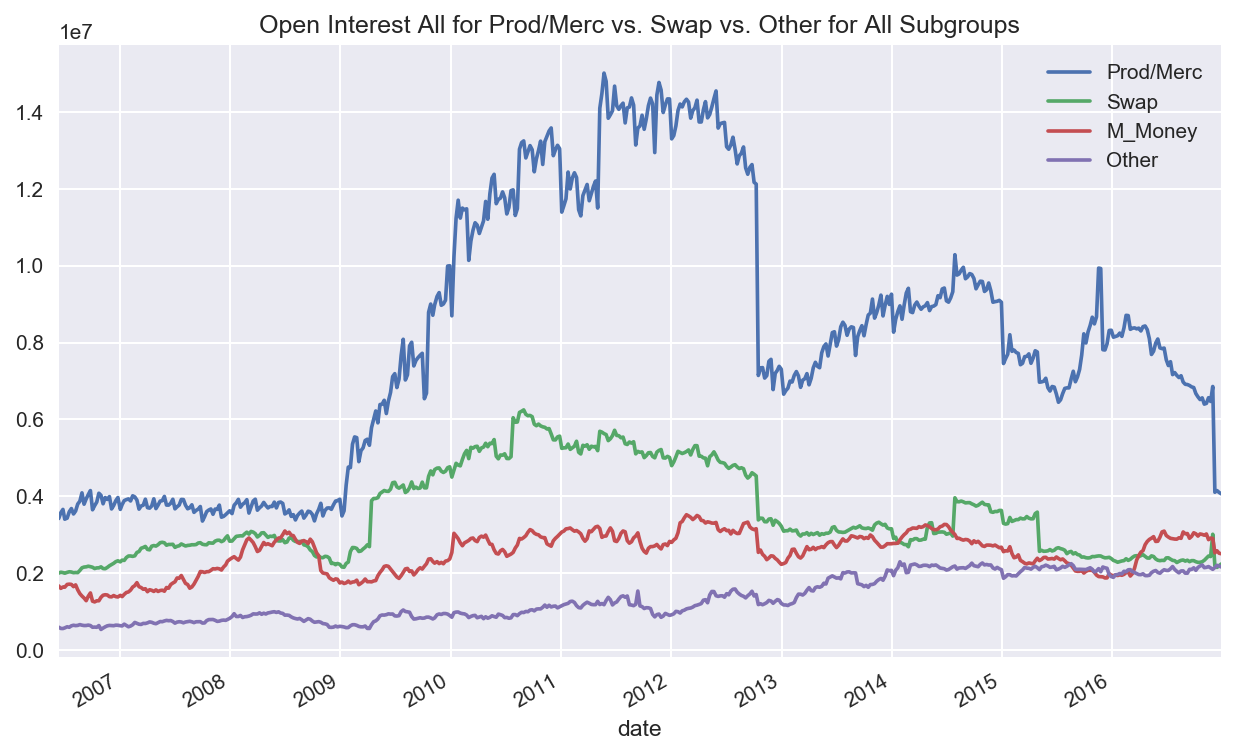

In [16]:
# All subgroups
plot_interest_by_buyer_type(df)

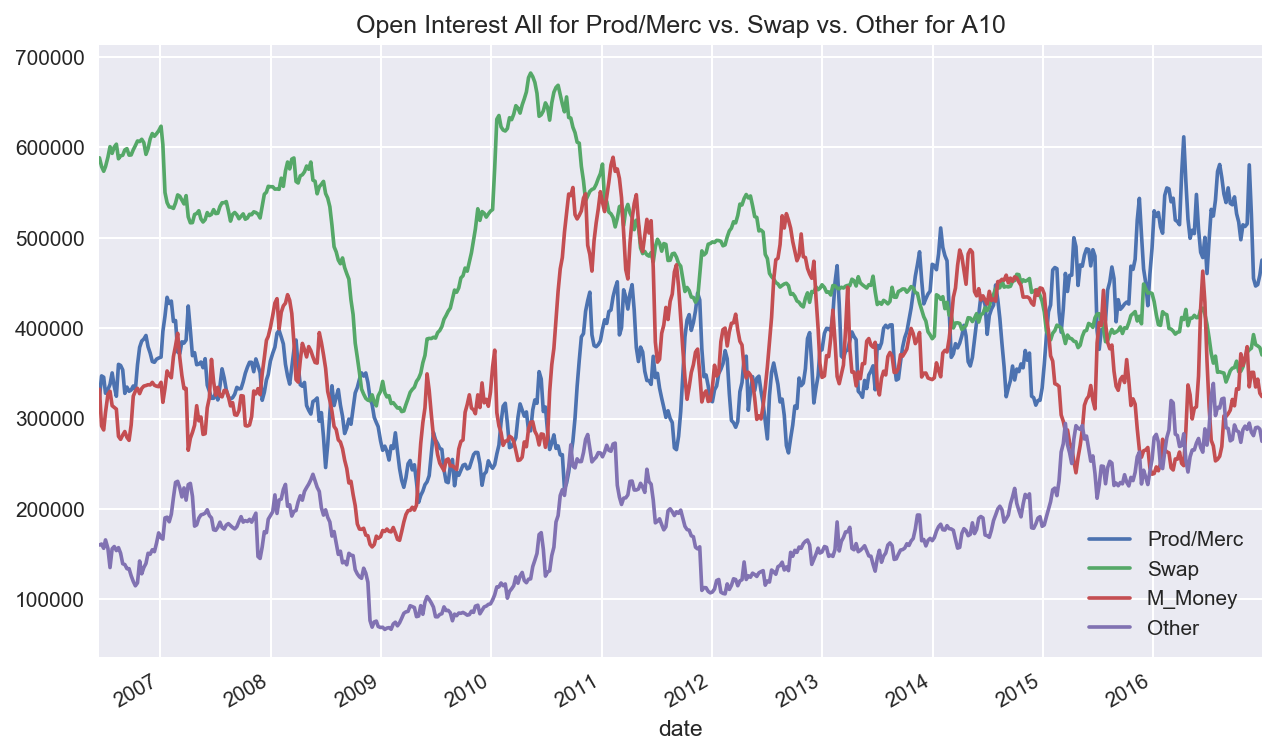

In [17]:
# A10
plot_interest_by_buyer_type(df, 'A10')

## Filtering The Data

In [18]:
def plot_interest_by_buyer_type_filtered(df, subgroup_code=None, gaussian_param=3, show_unfiltered=False):
    """
    Plot the filtered (long) open interest for Producers/Merchants vs. Swap vs. M_Money vs. Other
    over time
    
    Arguments:
        df: the data to plot
        subgroup_code: (optional) the subgroup code (ex: A10) of the group to plot.
            if this argument is not given, all subgroups will be aggregated and plotted
        gaussian_param: (optional) the parameter of the gaussian filter
        show_unfiltered: (optional) a boolean indicating whether to show the unfiltered data as well
    """
    df = df[df['CFTC_Market_Code'] != 'IFED'] # Exclude IFED b/c of anomaly
    subgroup = df[df['CFTC_SubGroup_Code'] == subgroup_code]
    if subgroup_code == None:
        subgroup = df
        subgroup_code = 'All Subgroups'

    by_date = subgroup.groupby('date')
    plt.plot(subgroup['date'].unique(), gaussian_filter1d(by_date['Prod_Merc_Positions_Long_All'].sum(), gaussian_param), label='Prod/Merc Positions')
    plt.plot(subgroup['date'].unique(), gaussian_filter1d(by_date['Swap_Positions_Long_All'].sum(), gaussian_param), label='Swap Positions')
    plt.plot(subgroup['date'].unique(), gaussian_filter1d(by_date['M_Money_Positions_Long_All'].sum(), gaussian_param), label='M_Money Positions')
    plt.plot(subgroup['date'].unique(), gaussian_filter1d(by_date['Other_Rept_Positions_Long_All'].sum(), gaussian_param), label='Other Positions')
    if show_unfiltered:
        by_date['Prod_Merc_Positions_Long_All'].sum().plot(label = 'Prod/Merc Unfiltered', color='blue', alpha=0.15)
        by_date['Swap_Positions_Long_All'].sum().plot(label = 'Swap Unfiltered', color='green', alpha=0.15)
        by_date['M_Money_Positions_Long_All'].sum().plot(label = 'M_Money Unfiltered', color='red', alpha=0.15)
        by_date['Other_Rept_Positions_Long_All'].sum().plot(label = 'Other Unfiltered', color='purple', alpha=0.15)
    plt.title('Filtered Open Interest All for Prod/Merc vs. Swap vs. Other for ' + subgroup_code)
    plt.legend()
    plt.show()

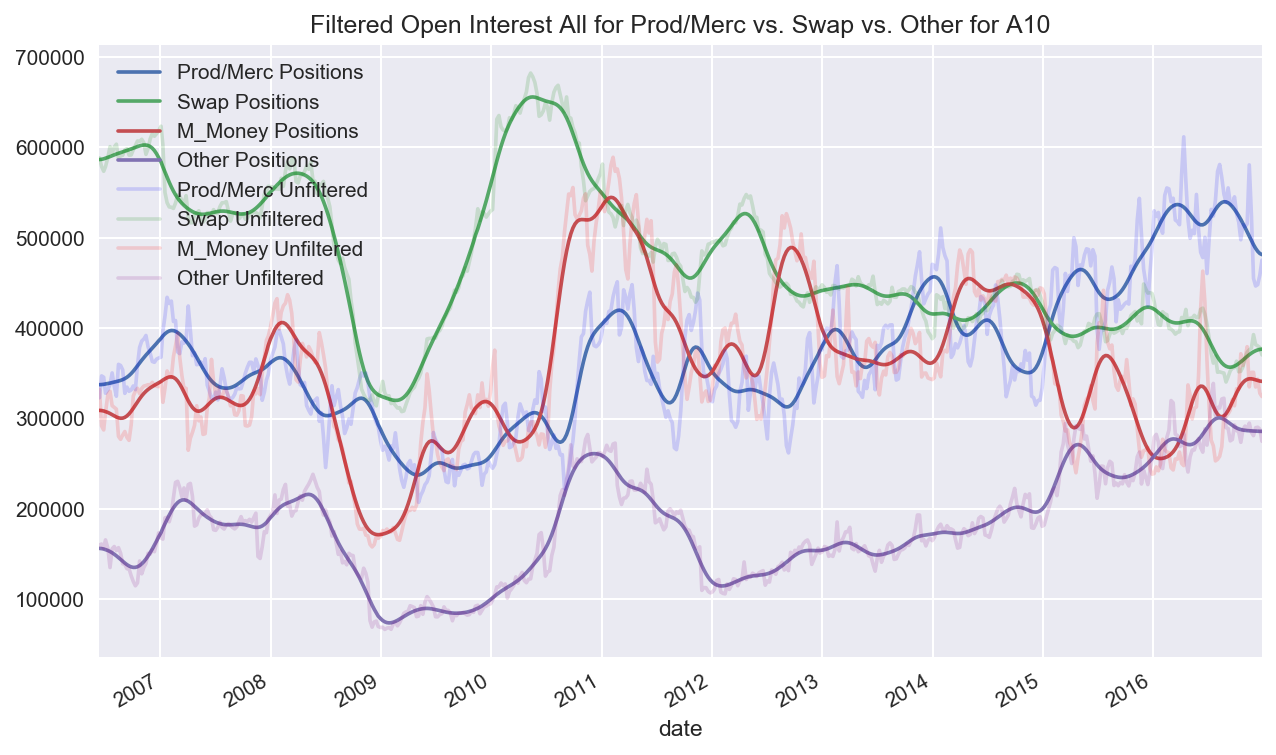

In [19]:
# Example
plot_interest_by_buyer_type_filtered(df, 'A10', gaussian_param=5, show_unfiltered=True)

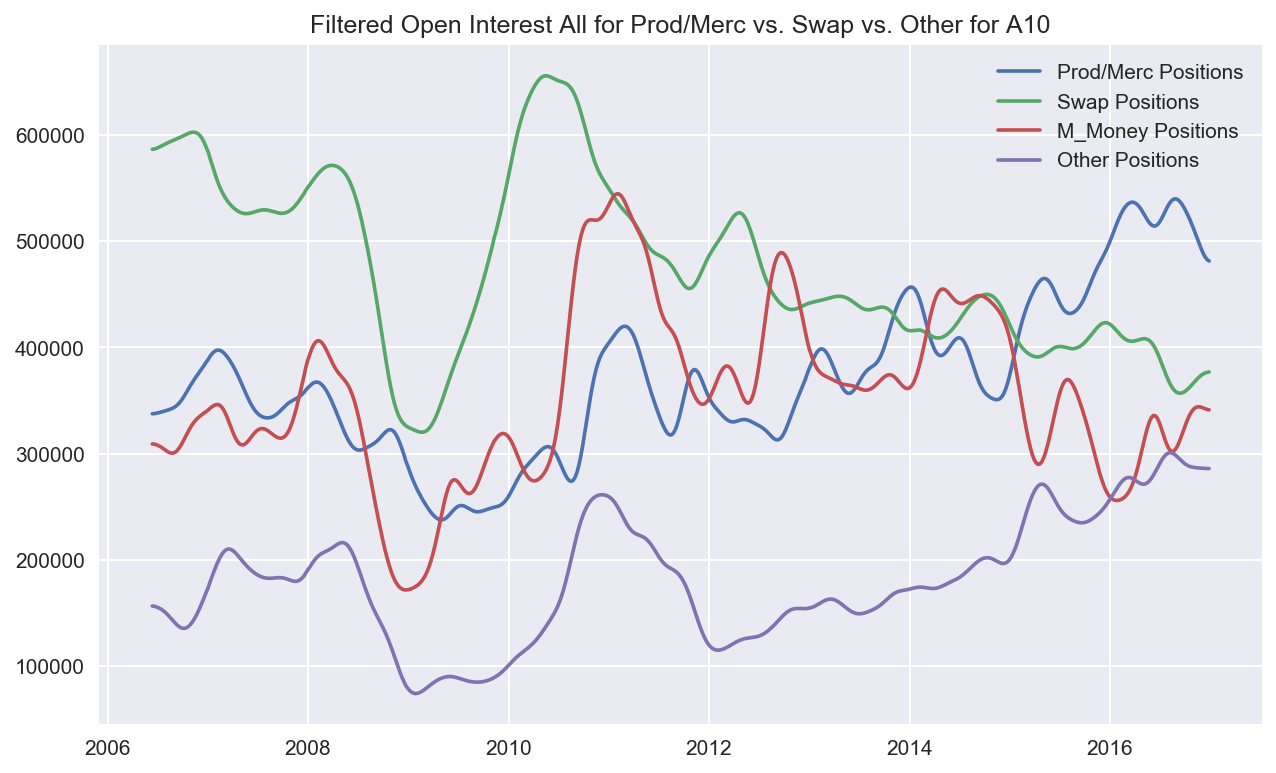

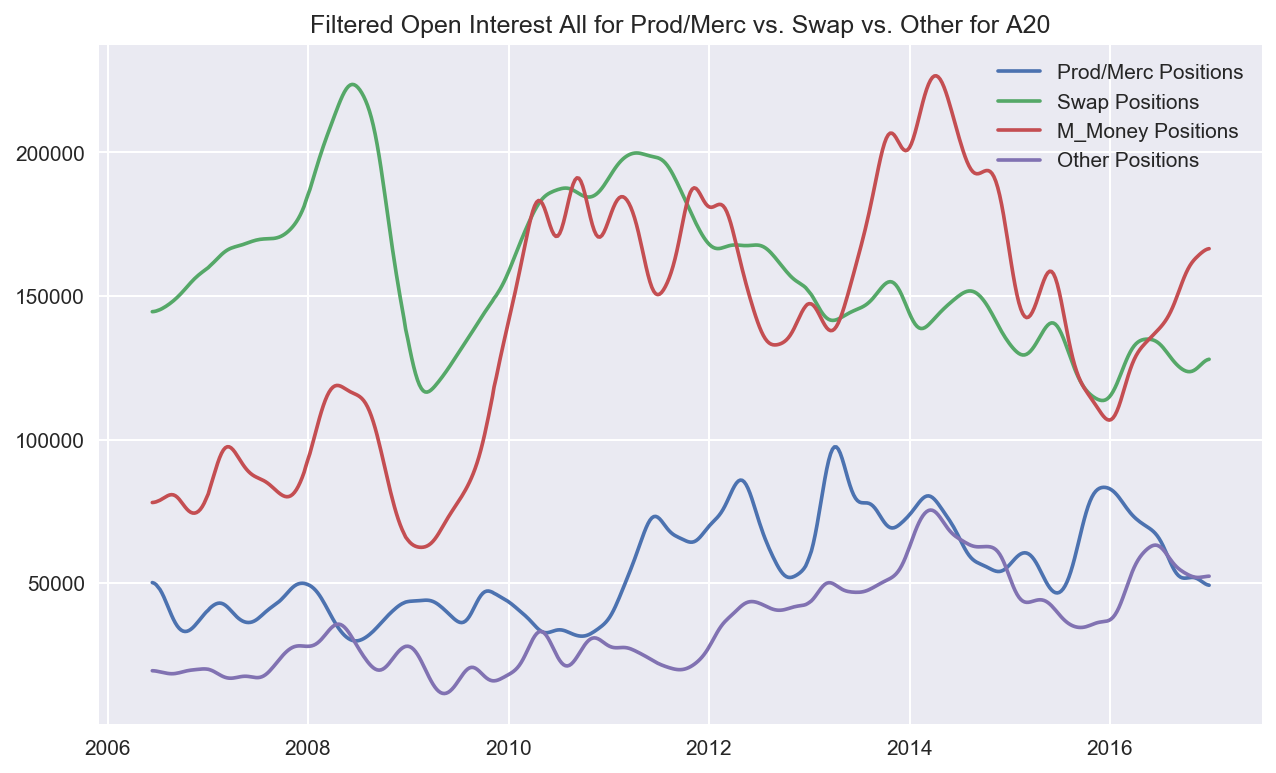

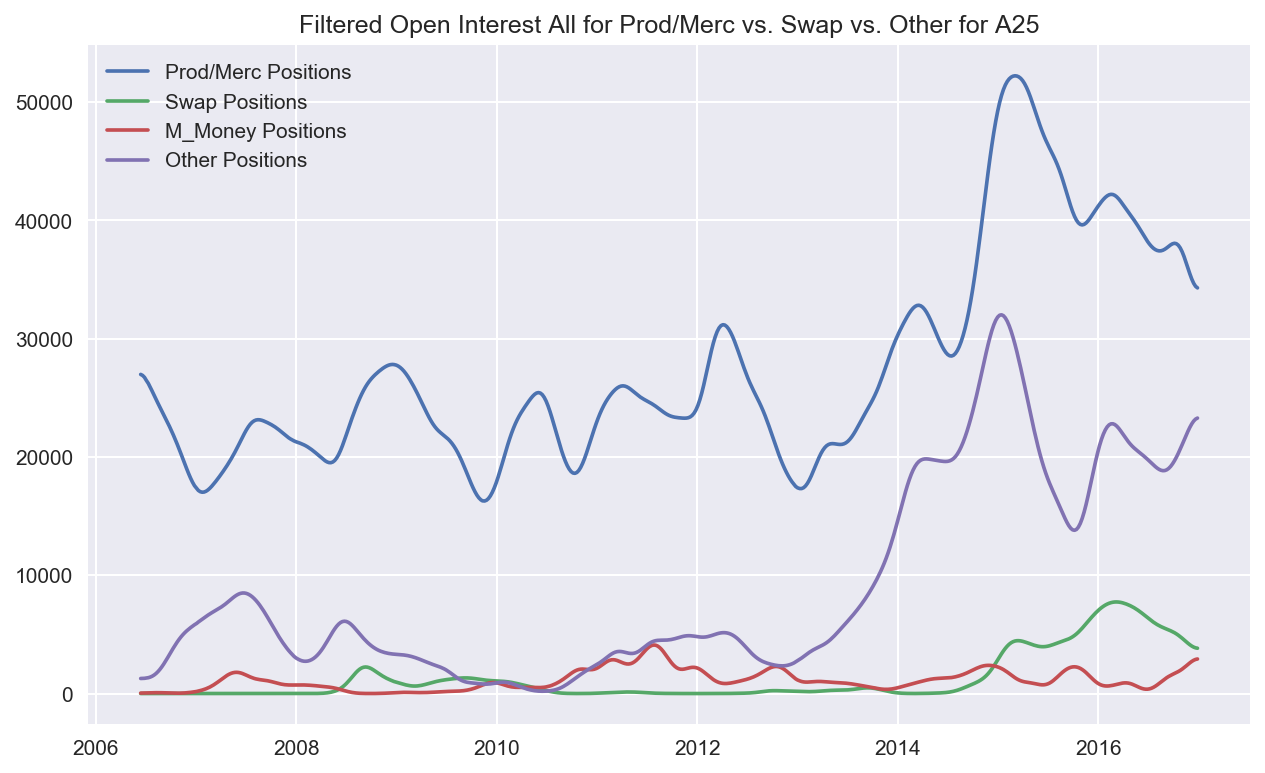

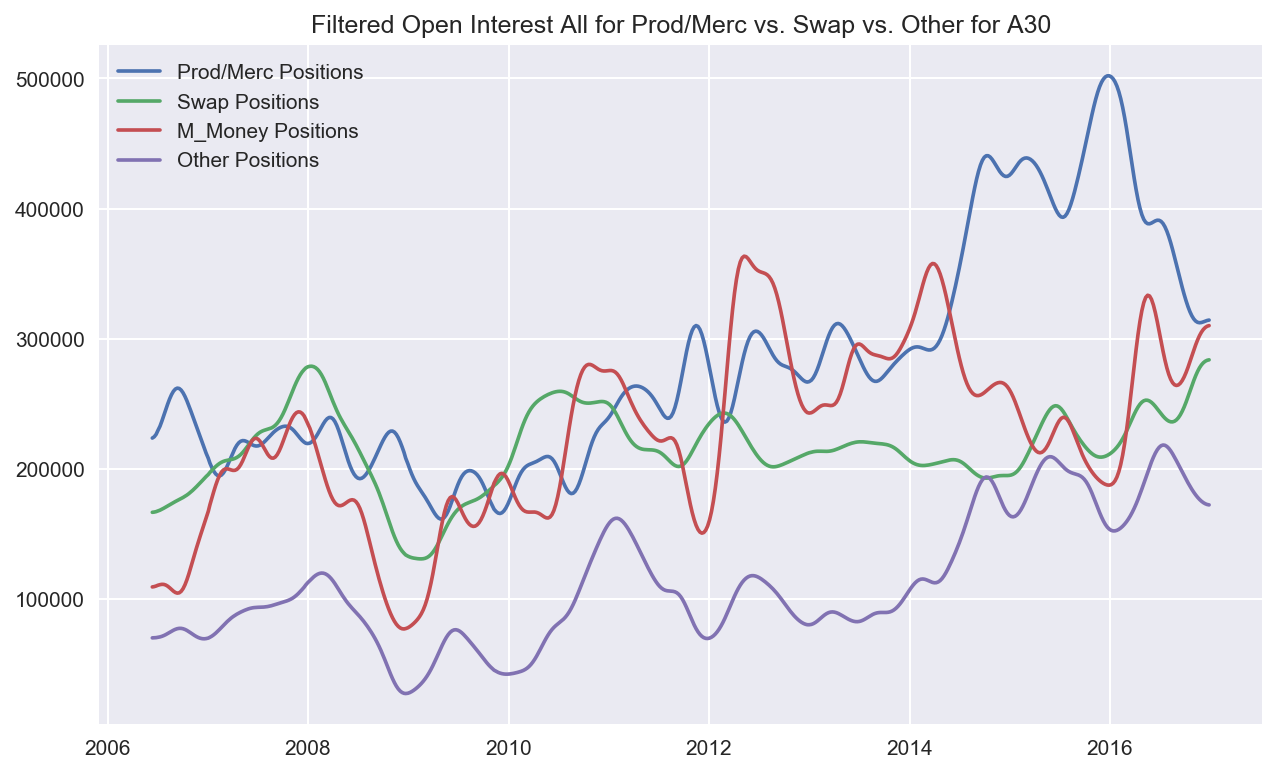

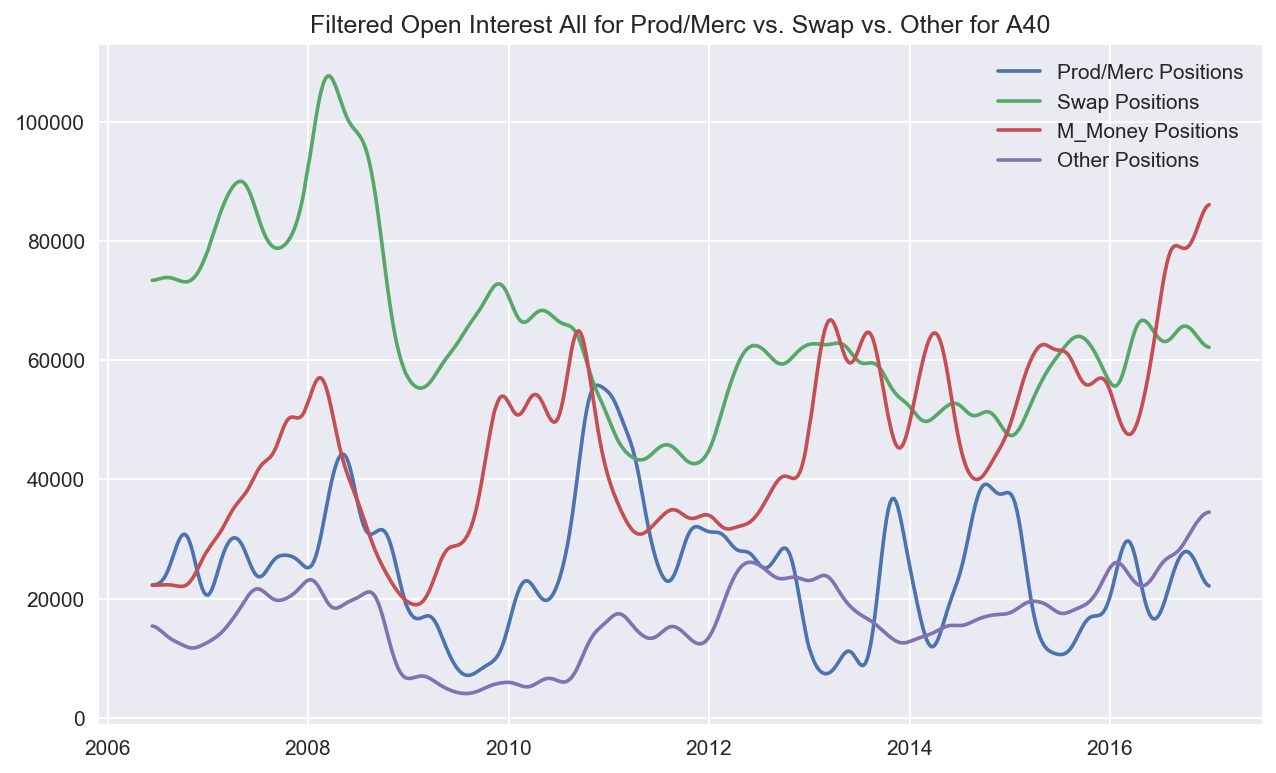

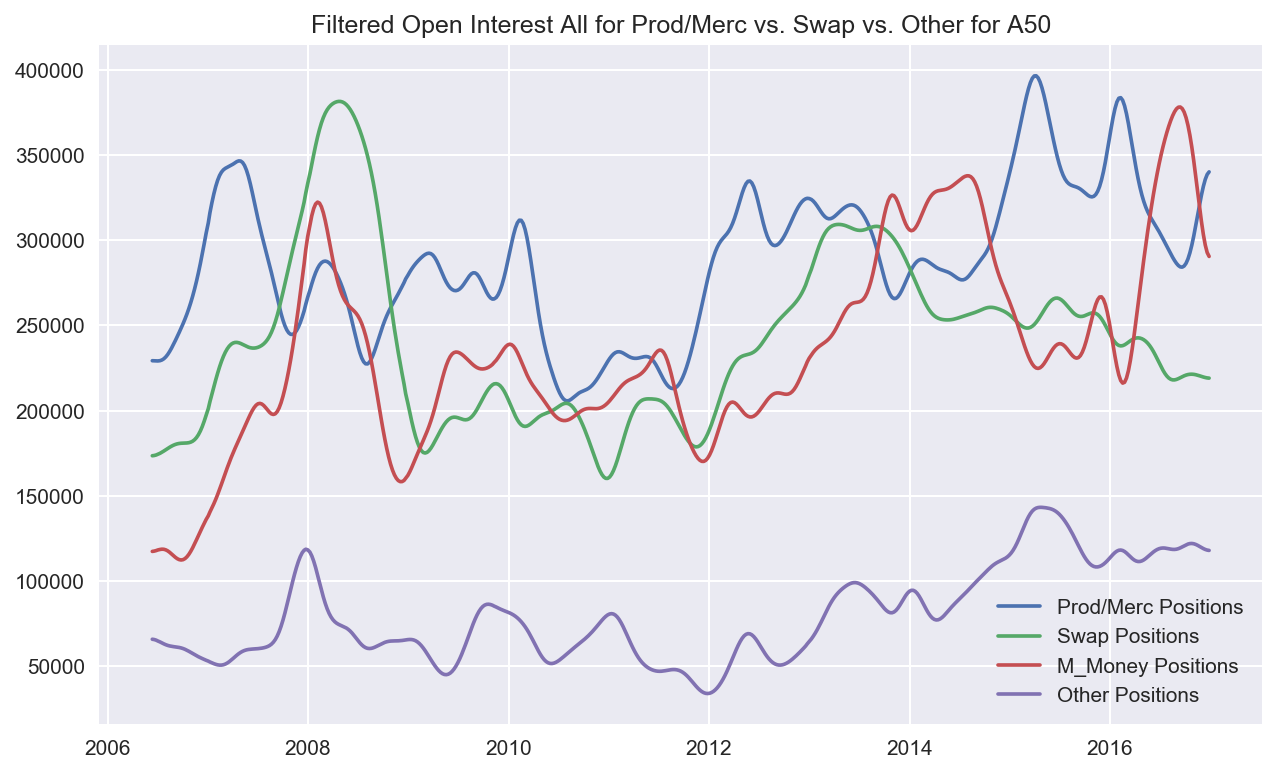

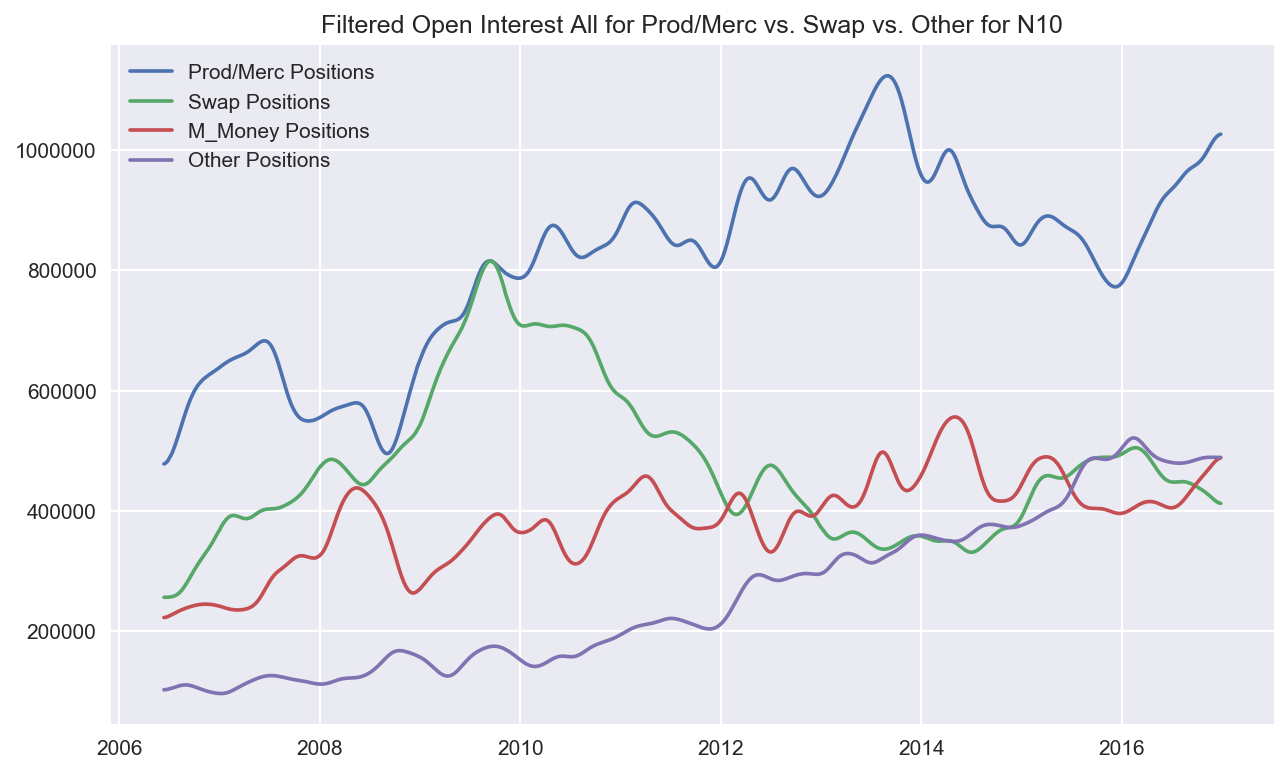

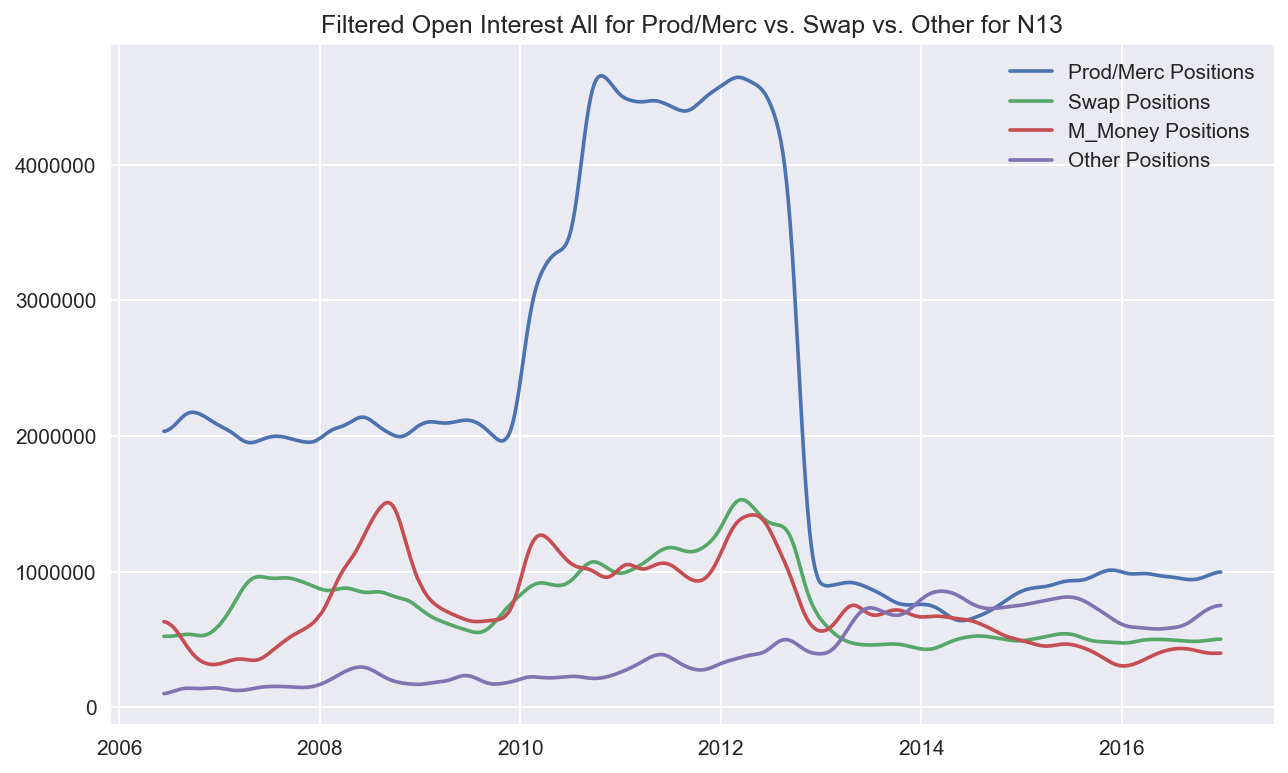

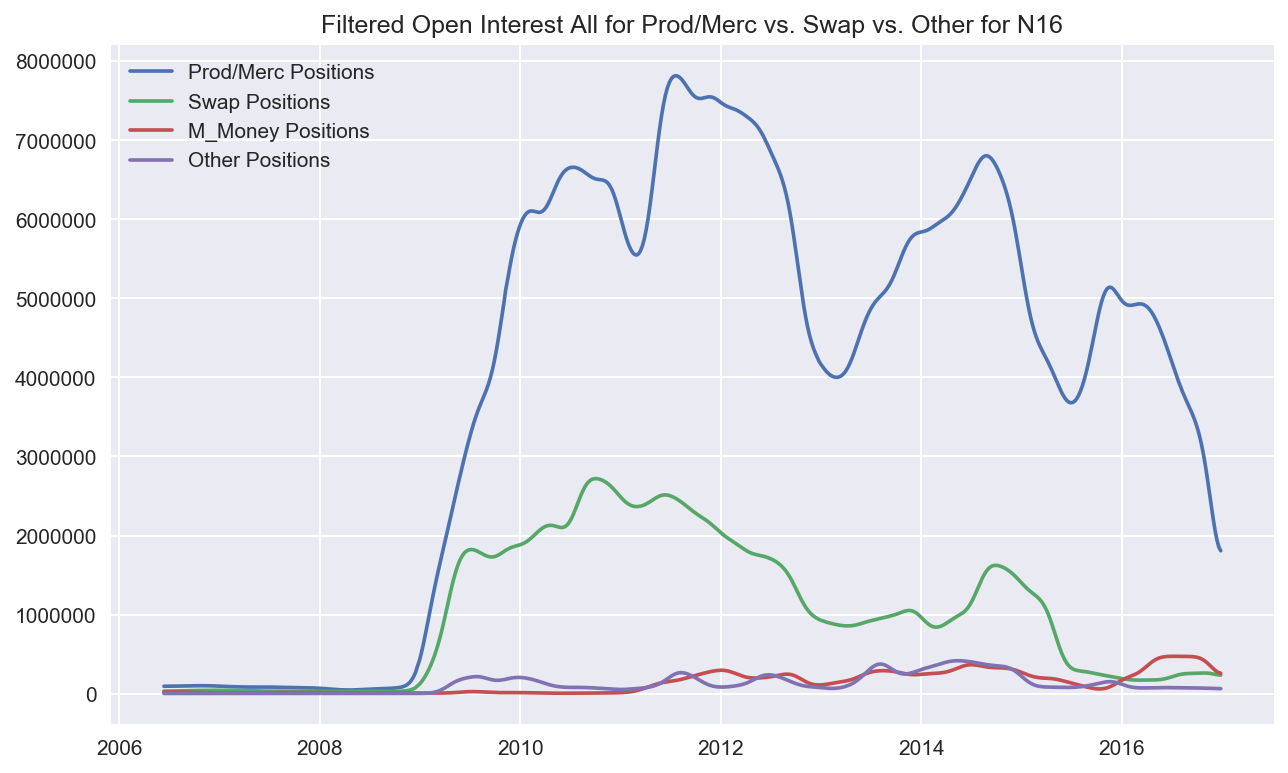

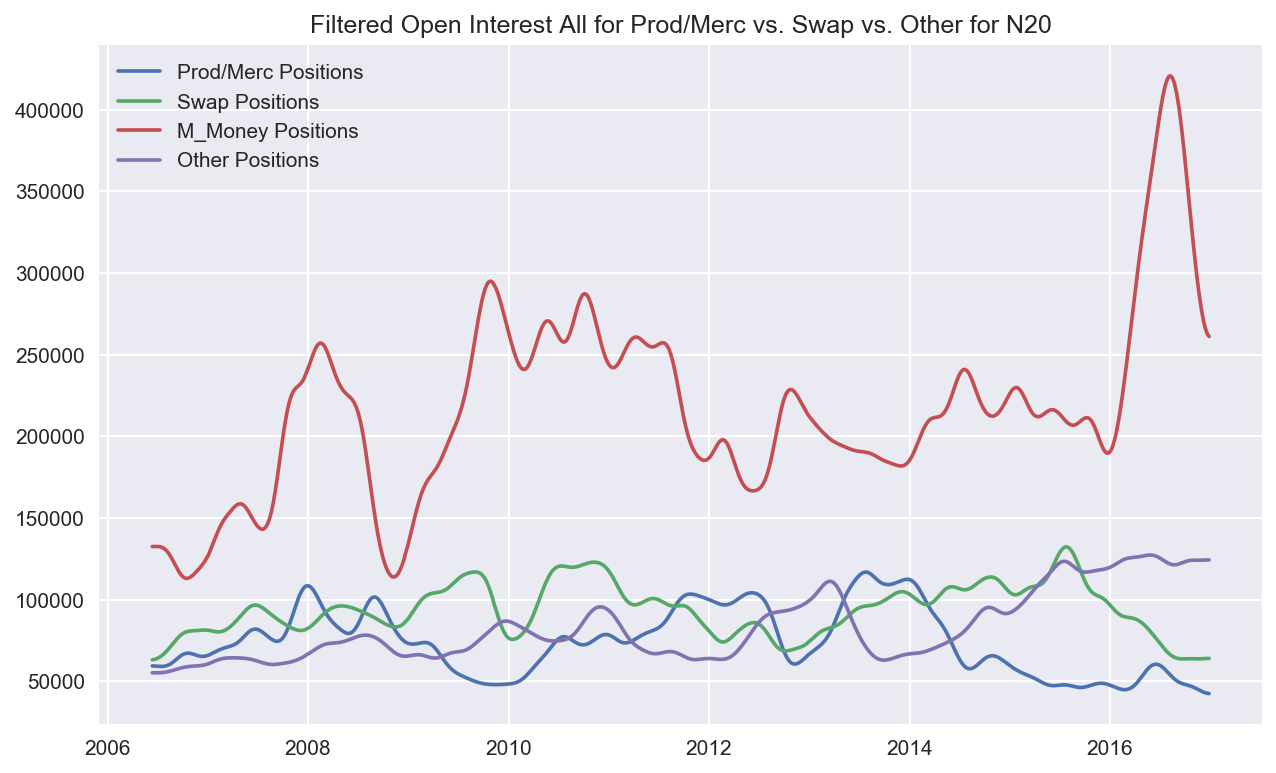

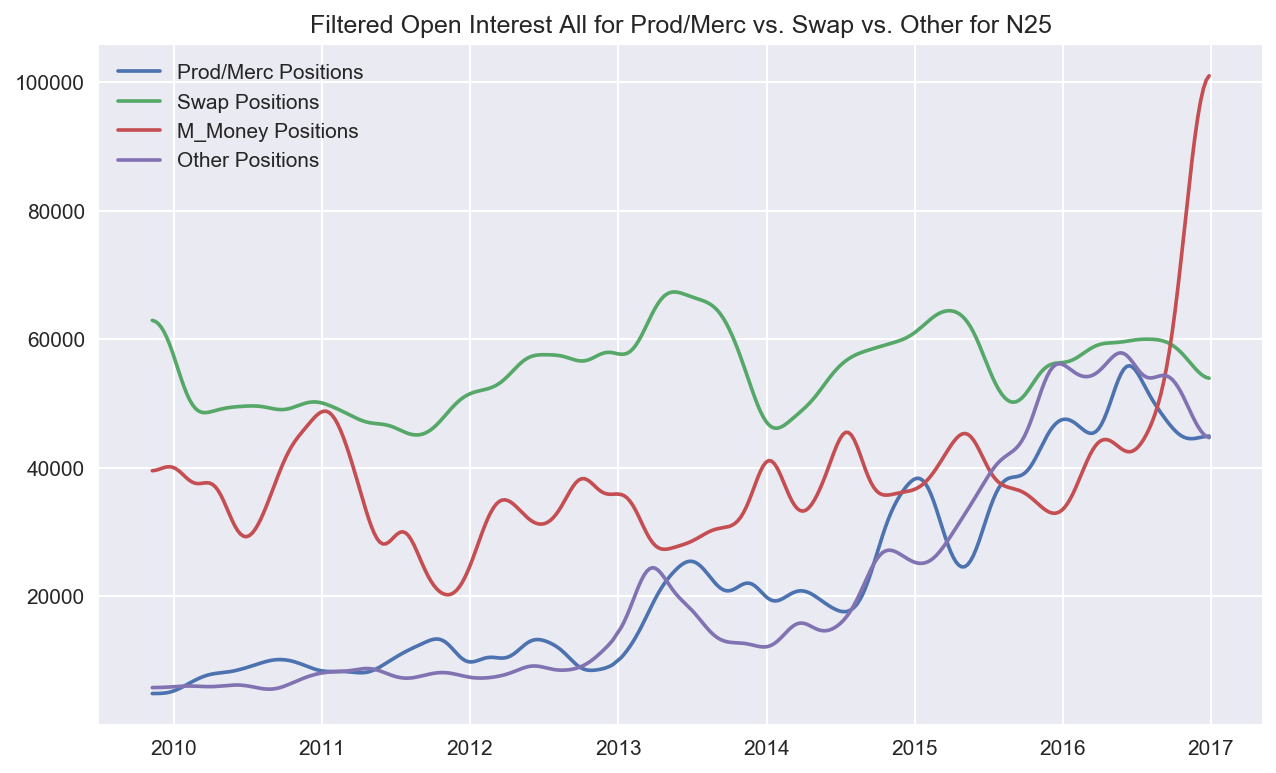

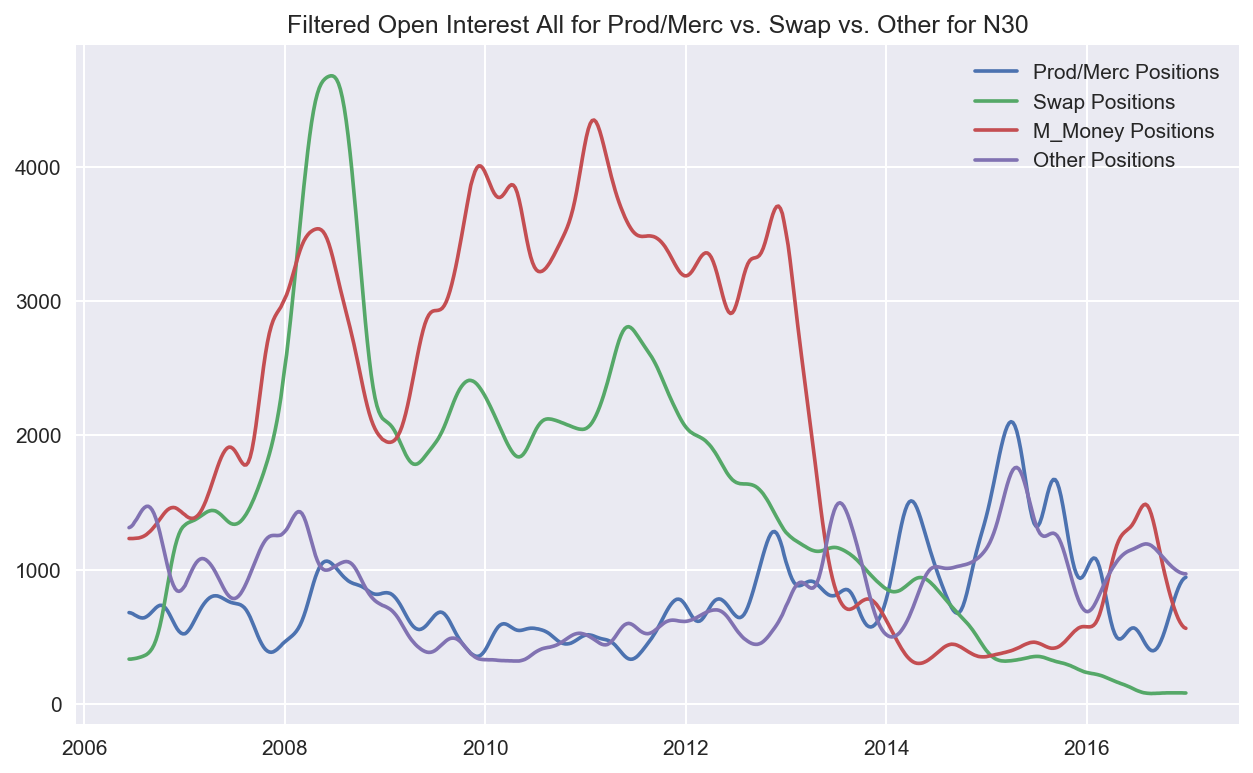

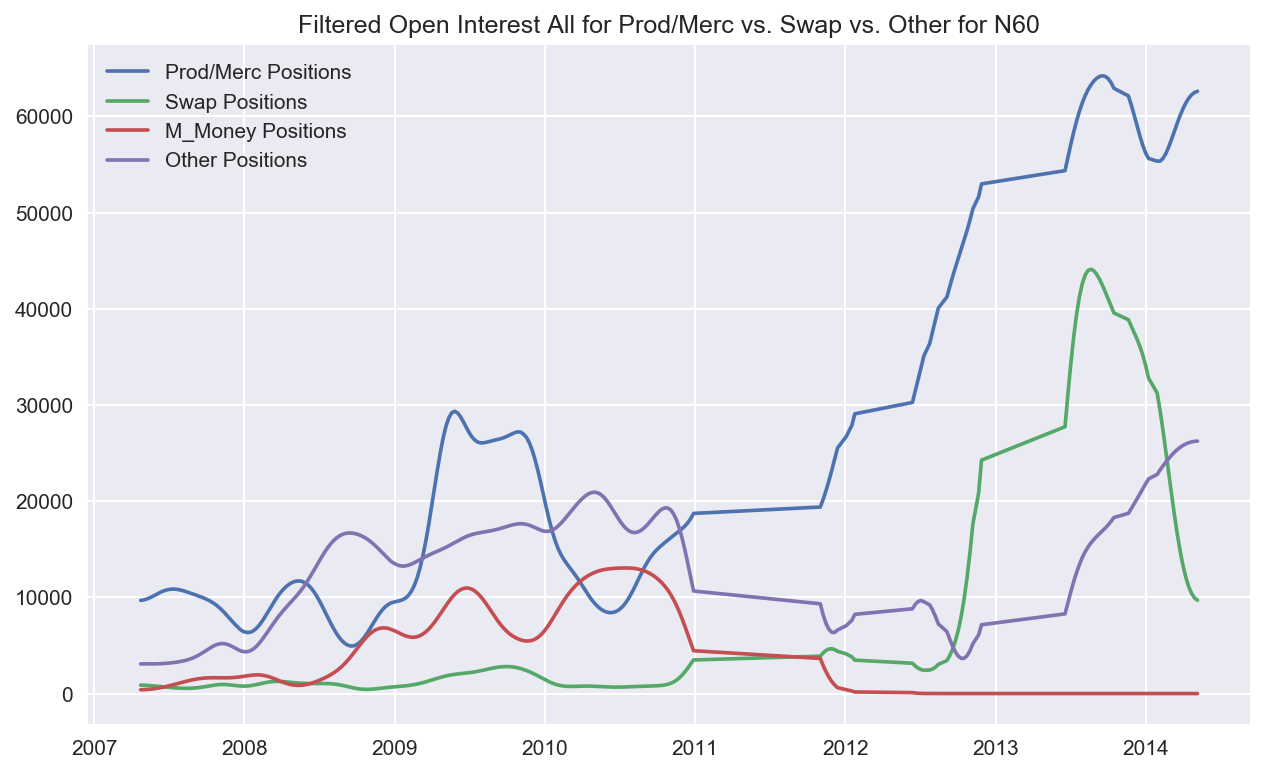

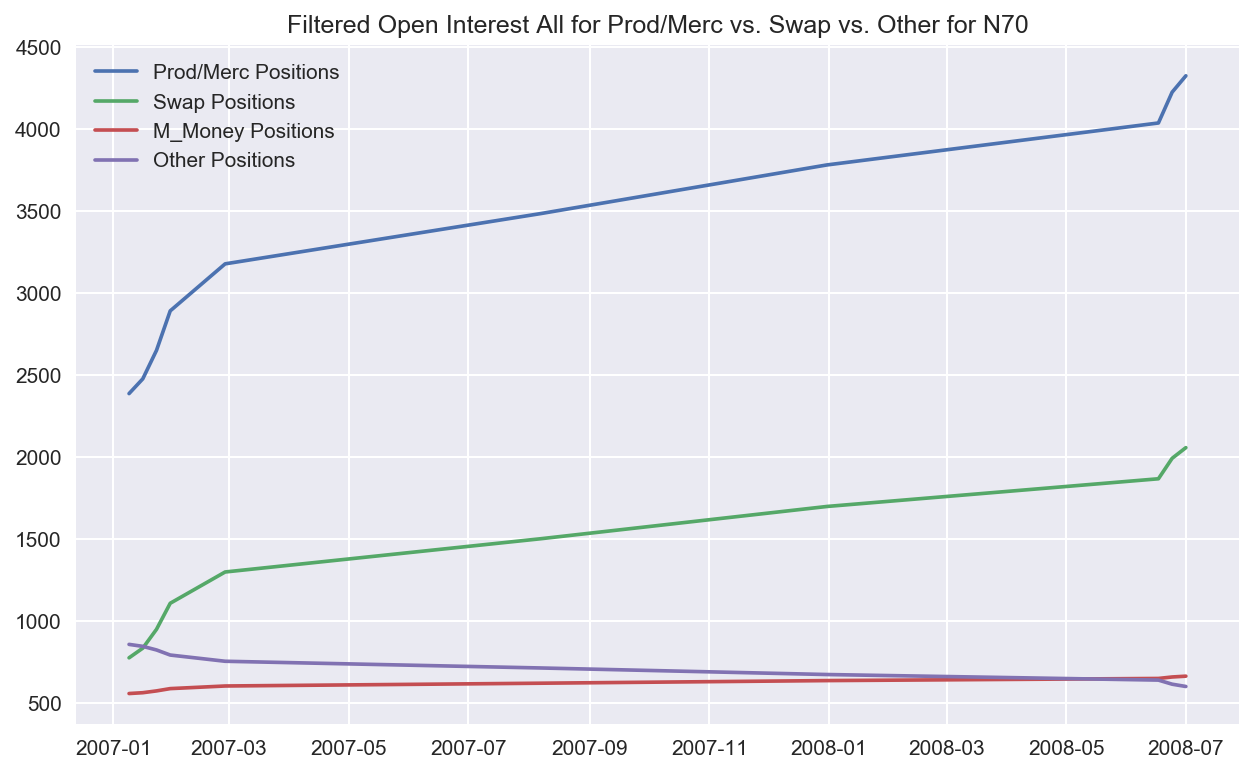

In [20]:
for subgroup_code in sorted(df['CFTC_SubGroup_Code'].unique()):
    plot_interest_by_buyer_type_filtered(df, subgroup_code, gaussian_param=5)

## Interesting Takeaways
- N30 (Random Length Lumber) during the recession
  - open interest from prod/merc and other stayed about constant, but for swap dealers and money managers it went up     significantly.
  - Possible explanation: 2008 was a housing market crash. Lumber is an input to housing so swap dealers and money       managers may have exploited lumber price volatility for profit

## Ratios
### How does the ratio of producer/merchant open interest to total open interest changes over time?

In [21]:
def plot_prod_merc_ratio(df, subgroup_code=None):
    """
    Plot the ratio of prod/merc open interest to the total open interest over time
    
    Arguments:
        df: the data to plot
        subgroup_code: optional argument of the subgroup code (ex: A10) of the group to plot.
            if this argument is not given, all subgroups will be aggregated and plotted
    """
    df = df[df['CFTC_Market_Code'] != 'IFED'] # Exclude IFED b/c of anomaly
    subgroup = df[df['CFTC_SubGroup_Code'] == subgroup_code]
    if subgroup_code == None:
        subgroup = df
        subgroup_code = 'All Subgroups'

    by_date = subgroup.groupby('date')
    
    ratio = by_date['Prod_Merc_Positions_Long_All'].sum()/by_date['Tot_Rept_Positions_Long_All'].sum()
    ratio.plot(title = 'Ratio of Prod/Merc Long Positions over All Long Positions Over Time for ' + subgroup_code)

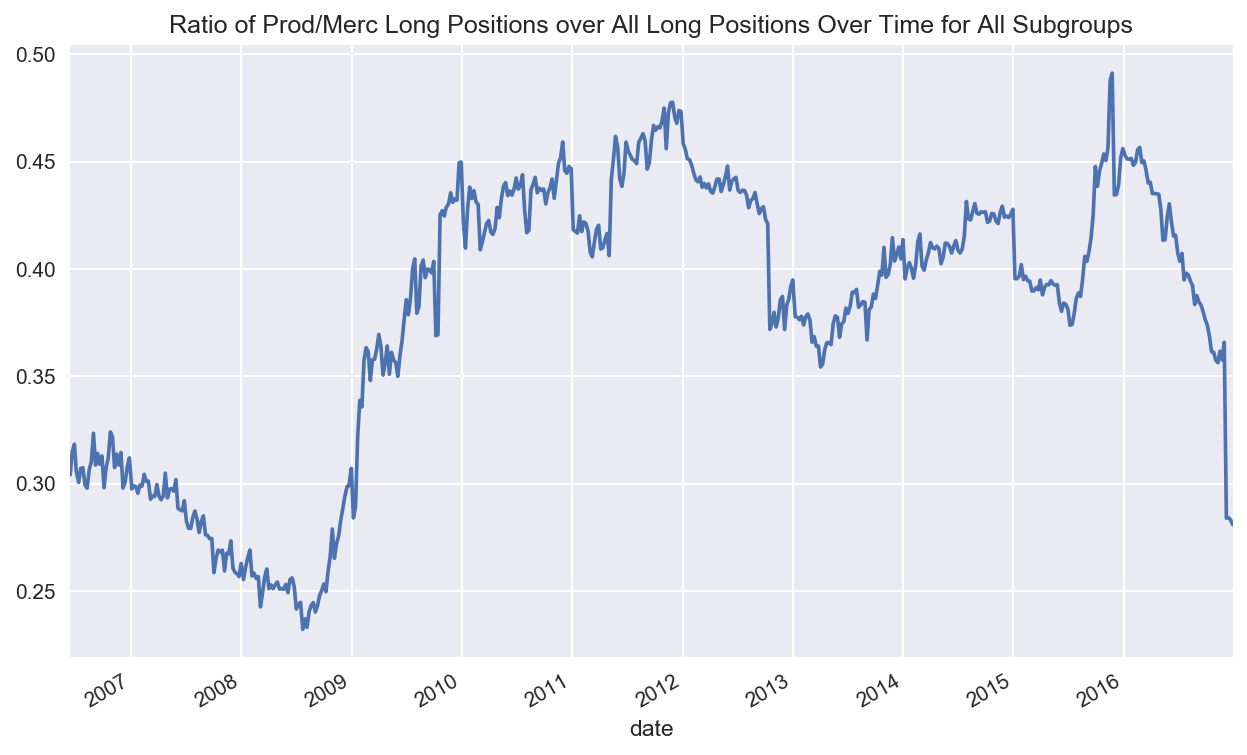

In [22]:
plot_prod_merc_ratio(df)

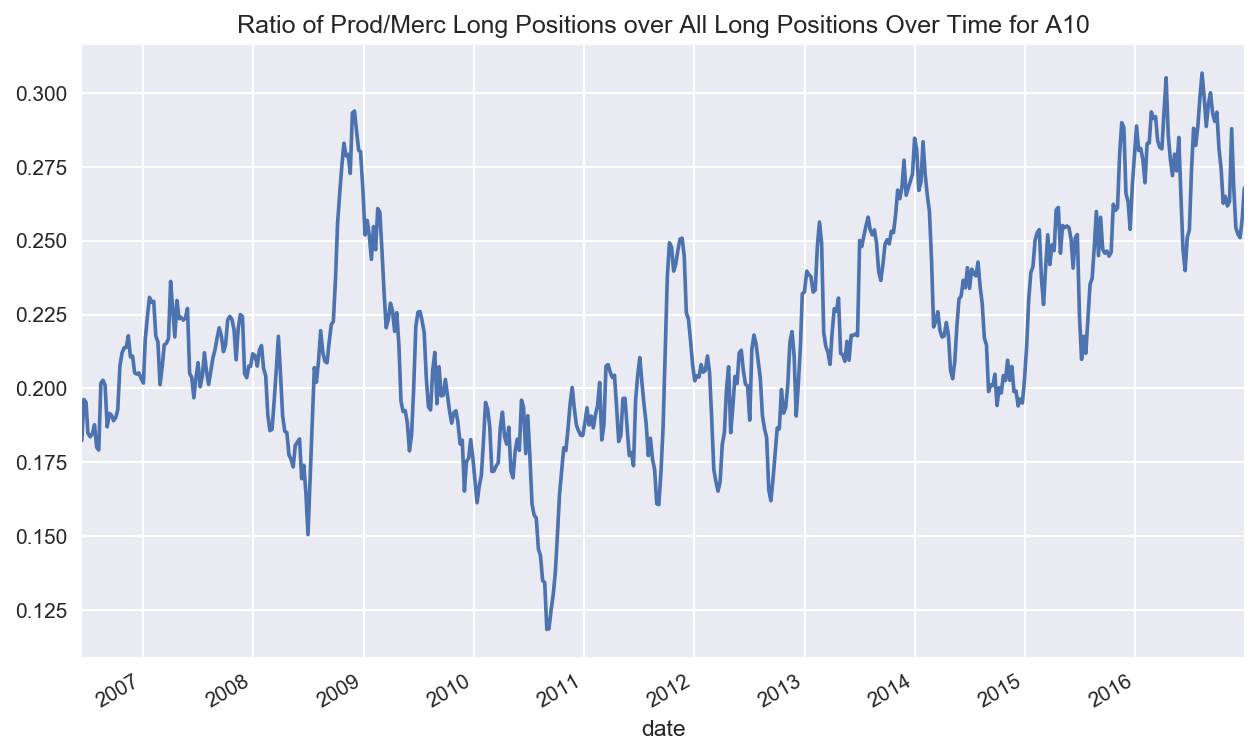

In [23]:
plot_prod_merc_ratio(df, 'A10')

### How does ratio of producer/merchant open interest to swap dealer open interest changes over time?

In [24]:
def plot_prod_merc_swap_ratio(df, subgroup_code=None):
    """
    Plot the ratio of prod/merc open interest over swap open interest over time
    
    Arguments:
        df: the data to plot
        subgroup_code: optional argument of the subgroup code (ex: A10) of the group to plot.
            if this argument is not given, all subgroups will be aggregated and plotted
    """
    df = df[df['CFTC_Market_Code'] != 'IFED'] # Exclude IFED b/c of anomaly
    subgroup = df[df['CFTC_SubGroup_Code'] == subgroup_code]
    if subgroup_code == None:
        subgroup = df
        subgroup_code = 'All Subgroups'

    by_date = subgroup.groupby('date')
    
    ratio = by_date['Prod_Merc_Positions_Long_All'].sum()/by_date['Swap_Positions_Long_All'].sum()
    ratio.plot(title = 'Ratio of Prod/Merc Long Positions over Swap Long Positions Over Time for ' + subgroup_code)

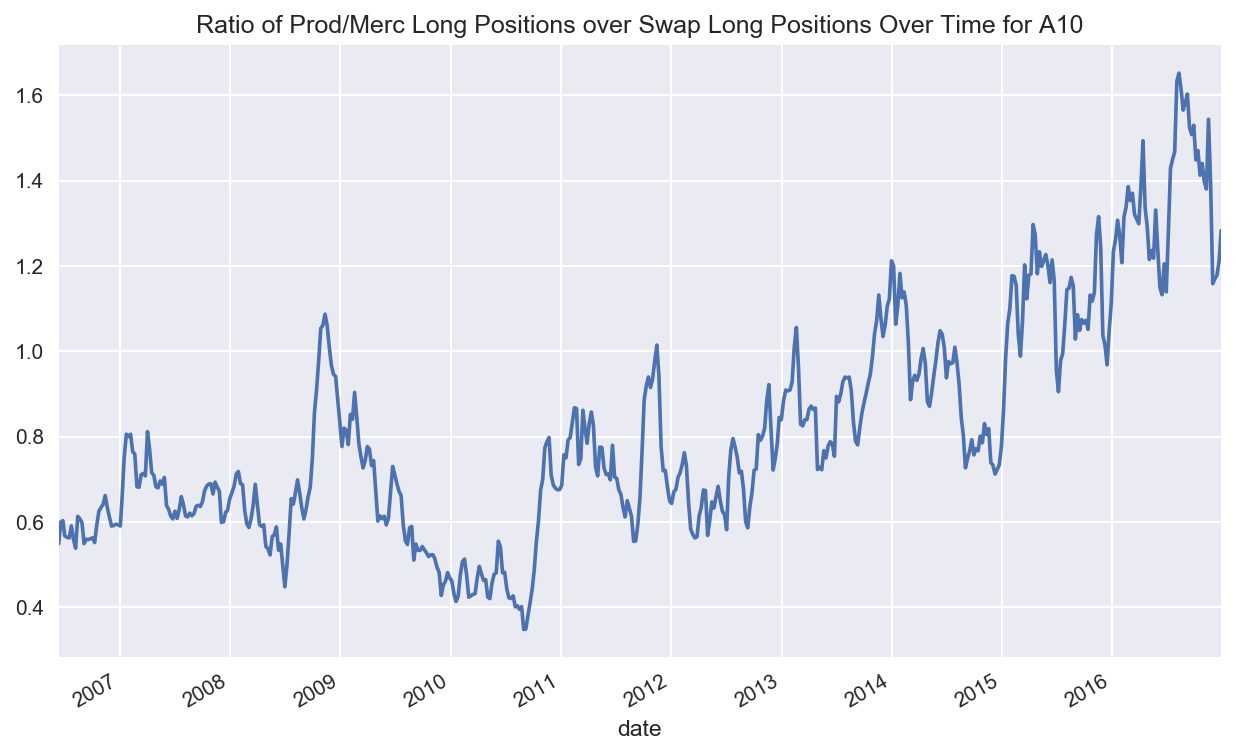

In [25]:
plot_prod_merc_swap_ratio(df, 'A10')

## Scatter Plots

### Do scatter plots reveal something new in the data in the line graphs above?

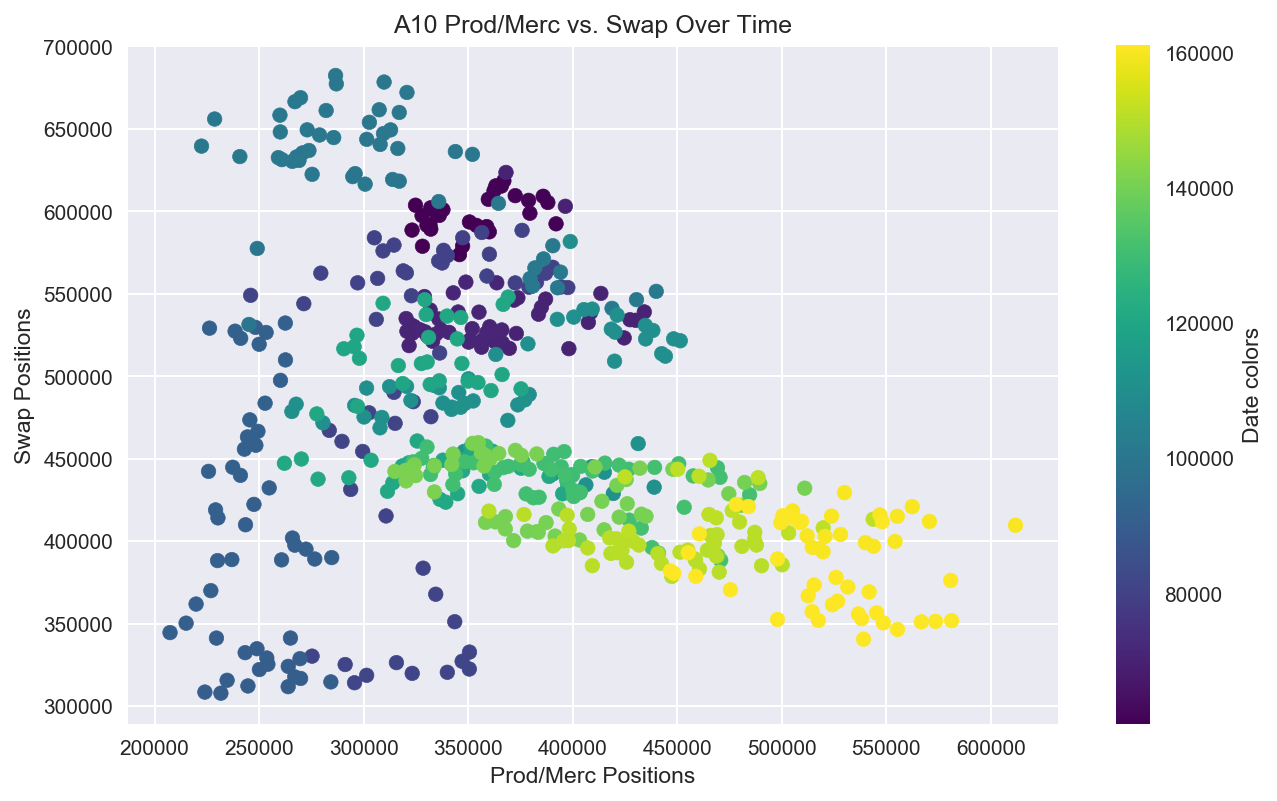

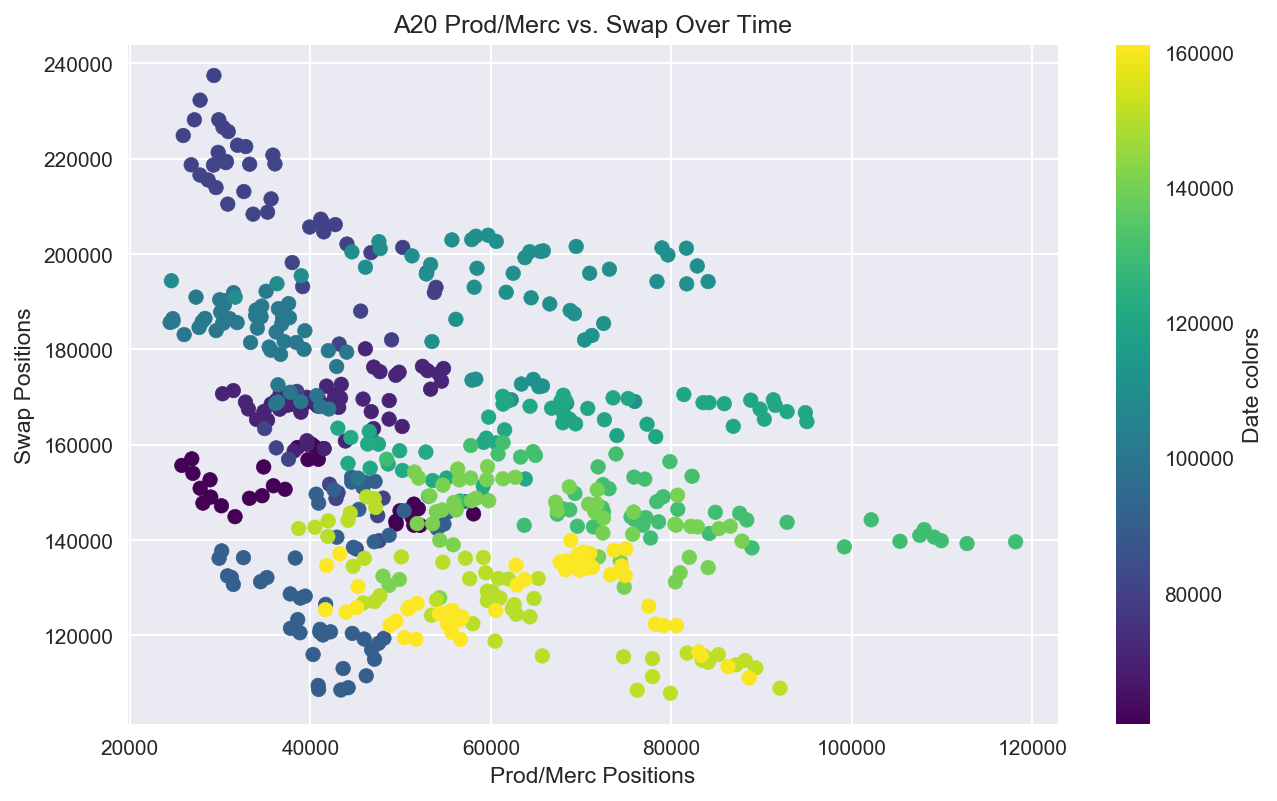

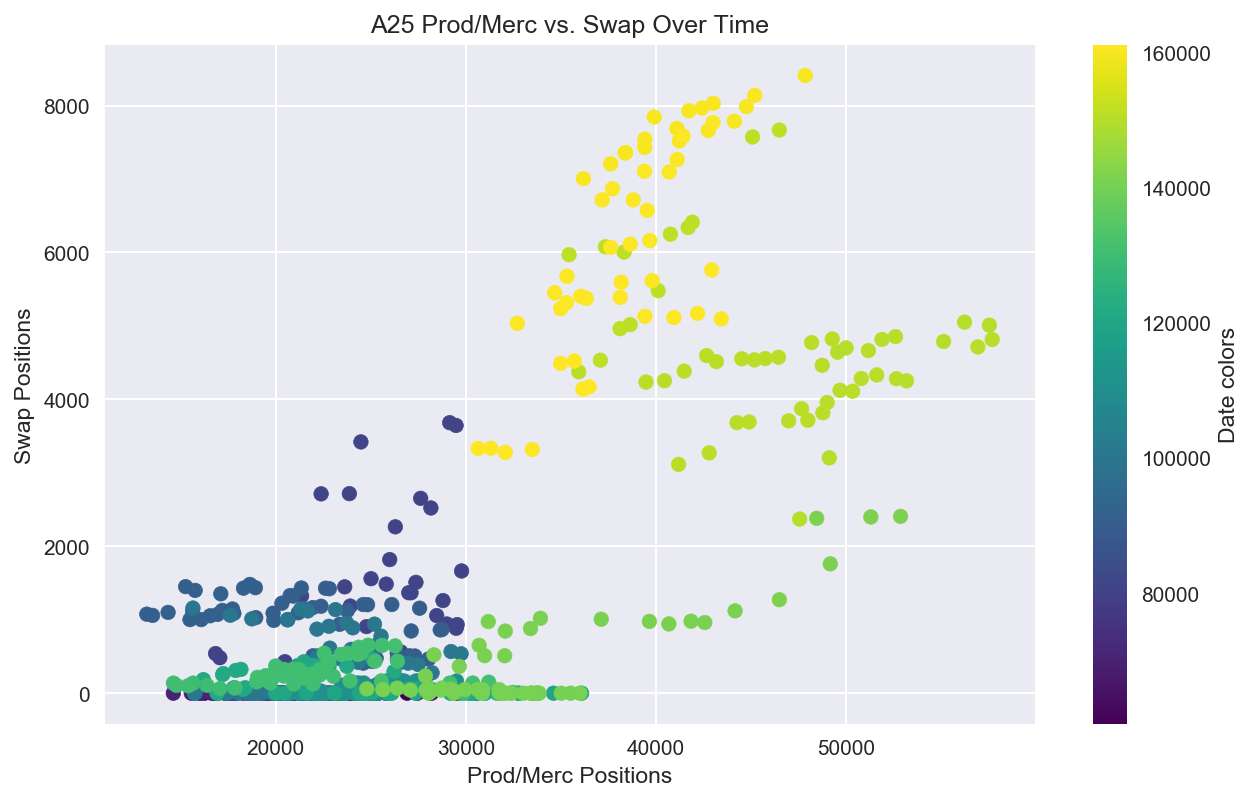

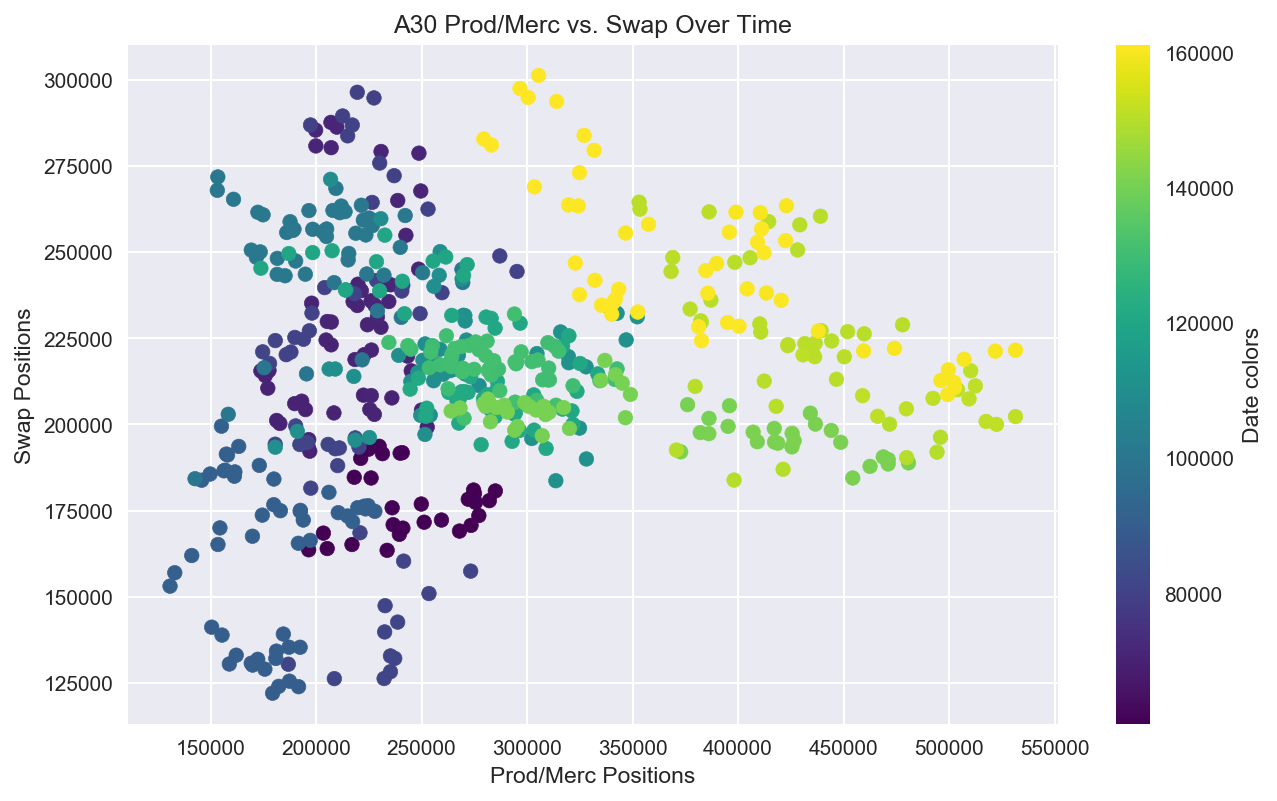

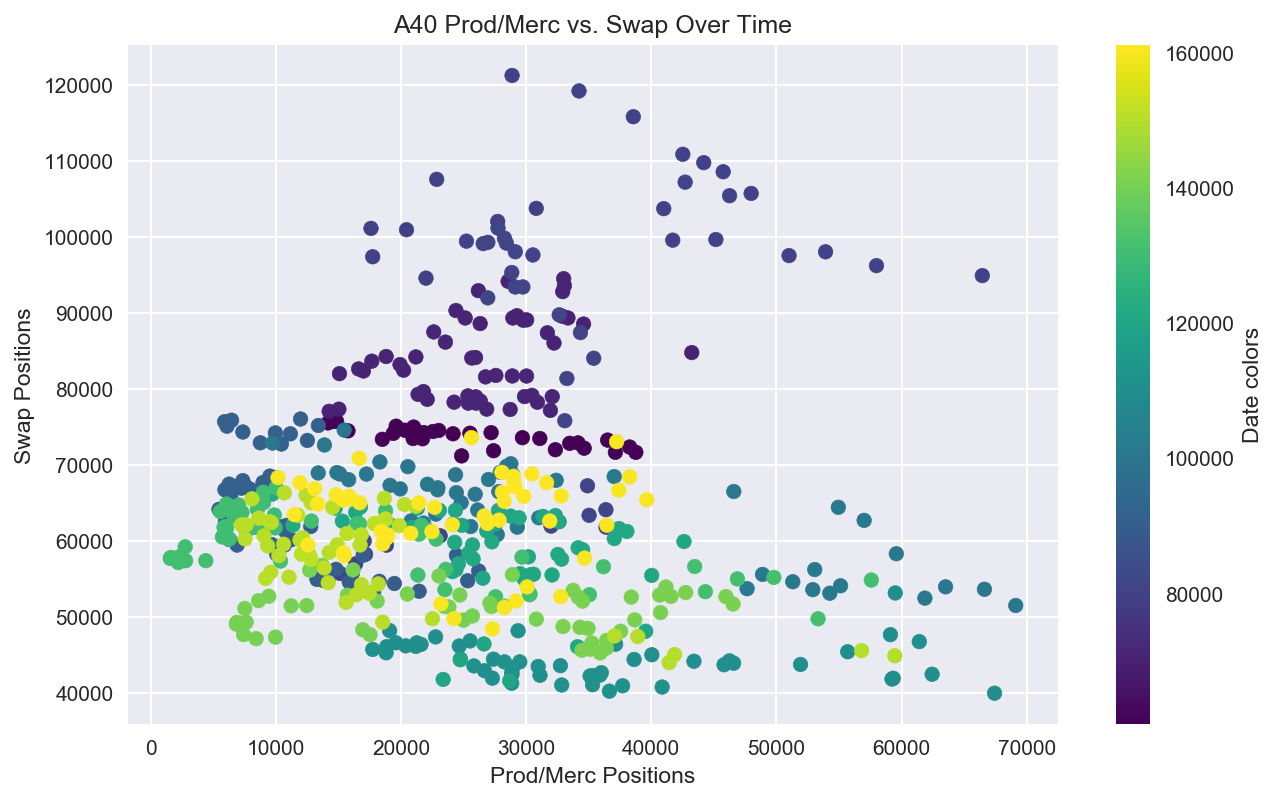

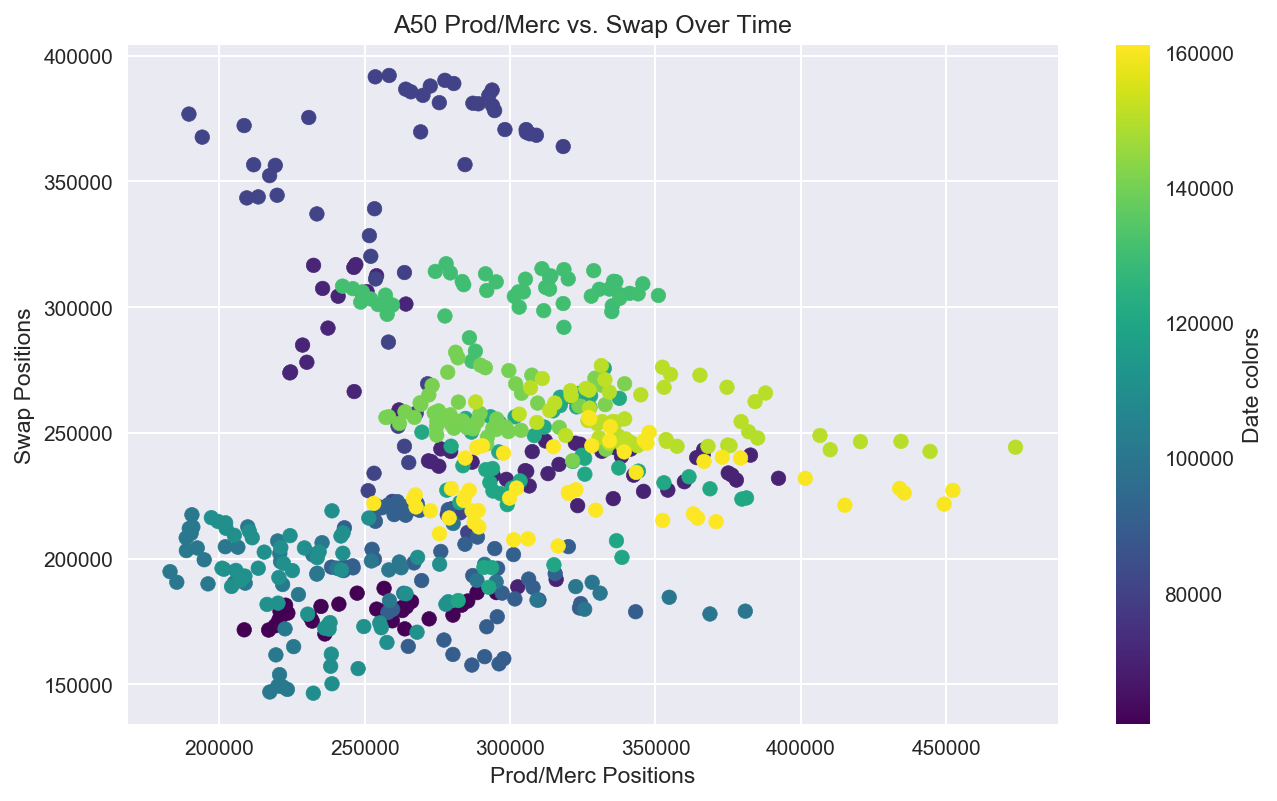

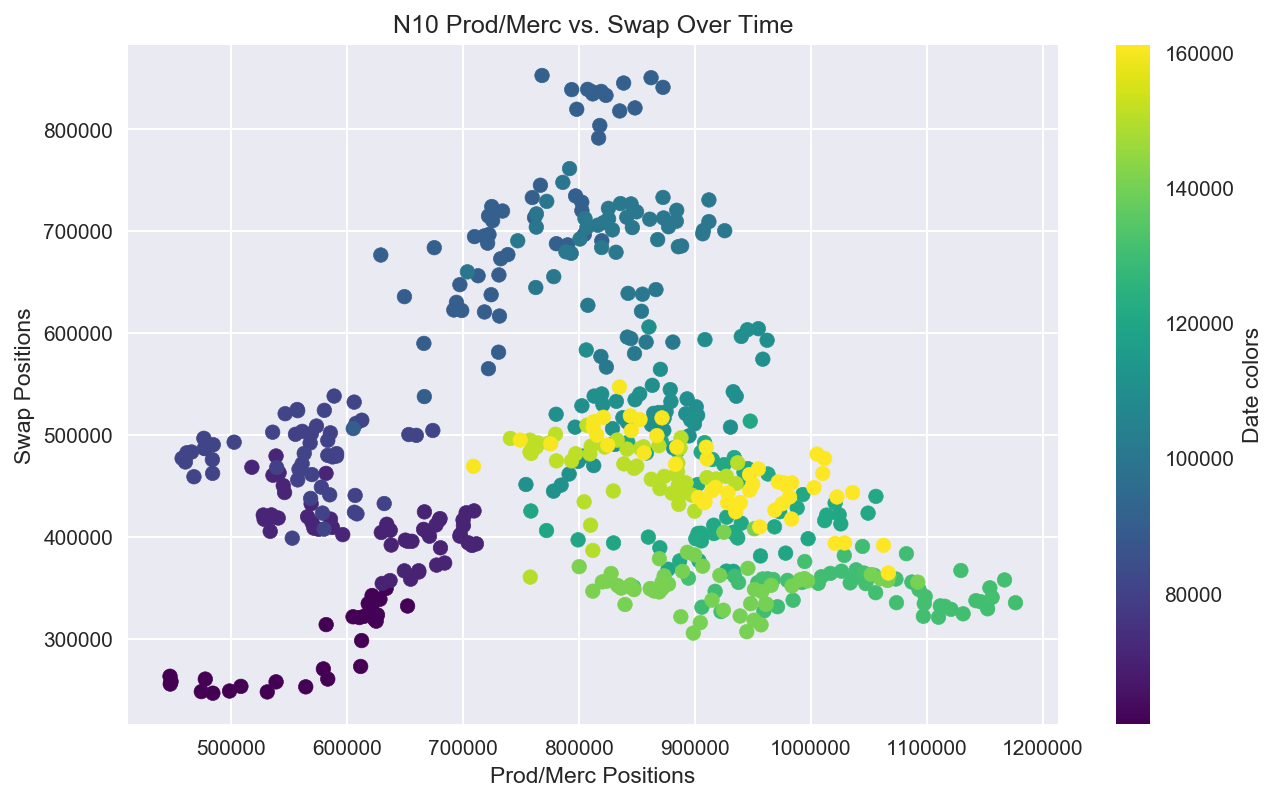

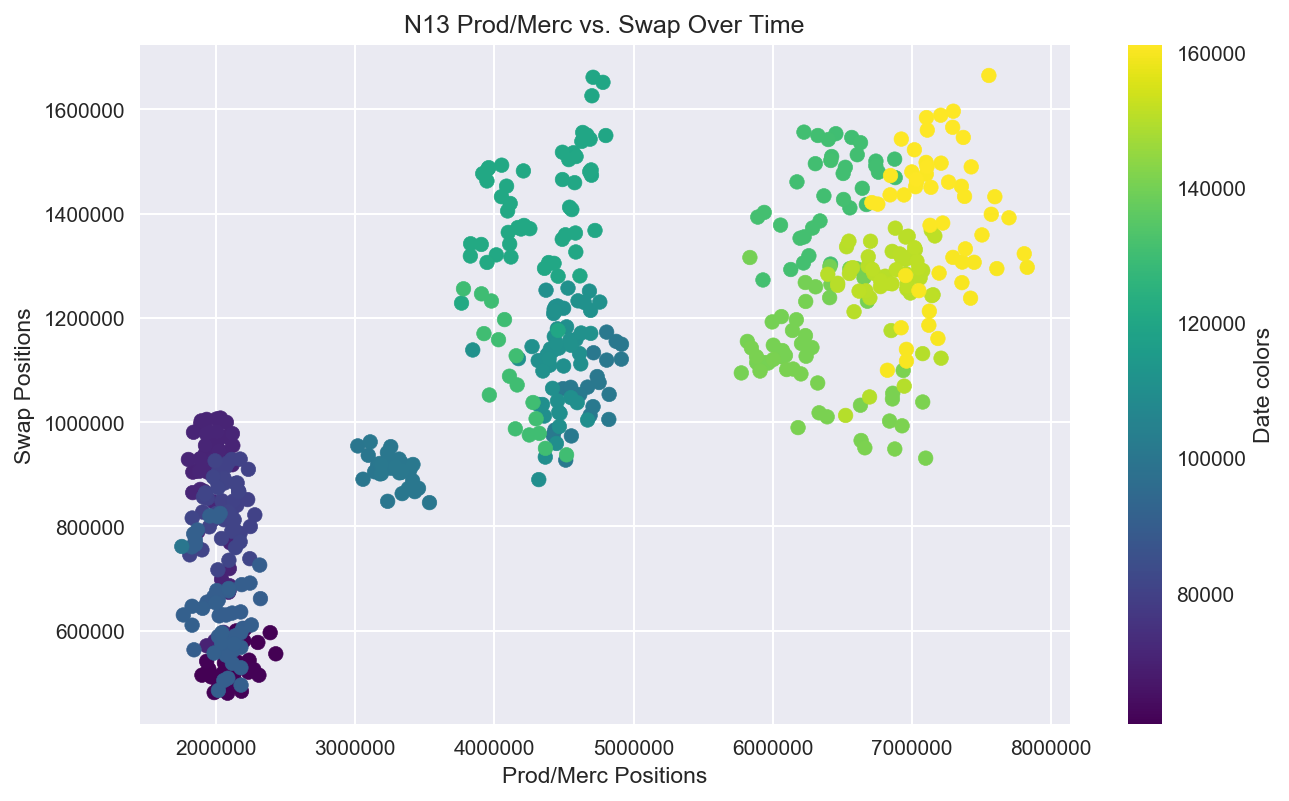

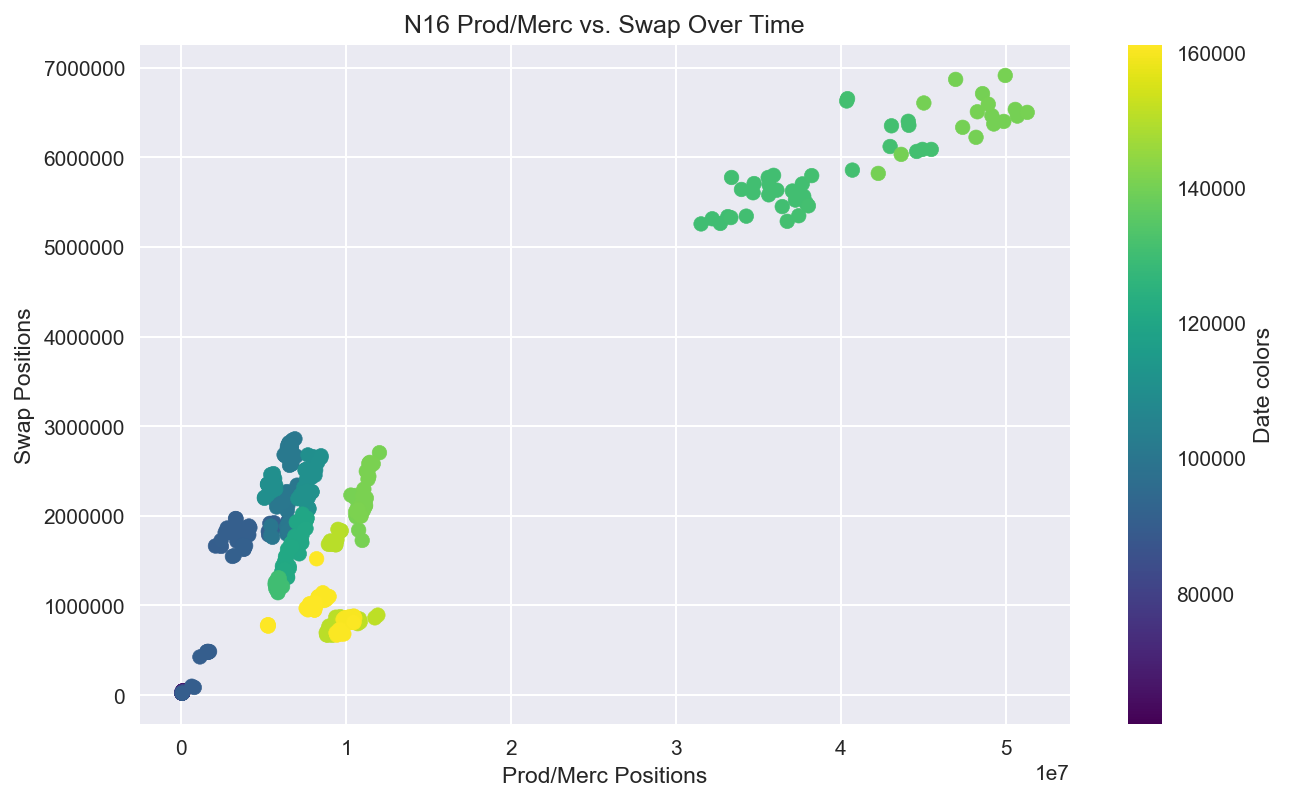

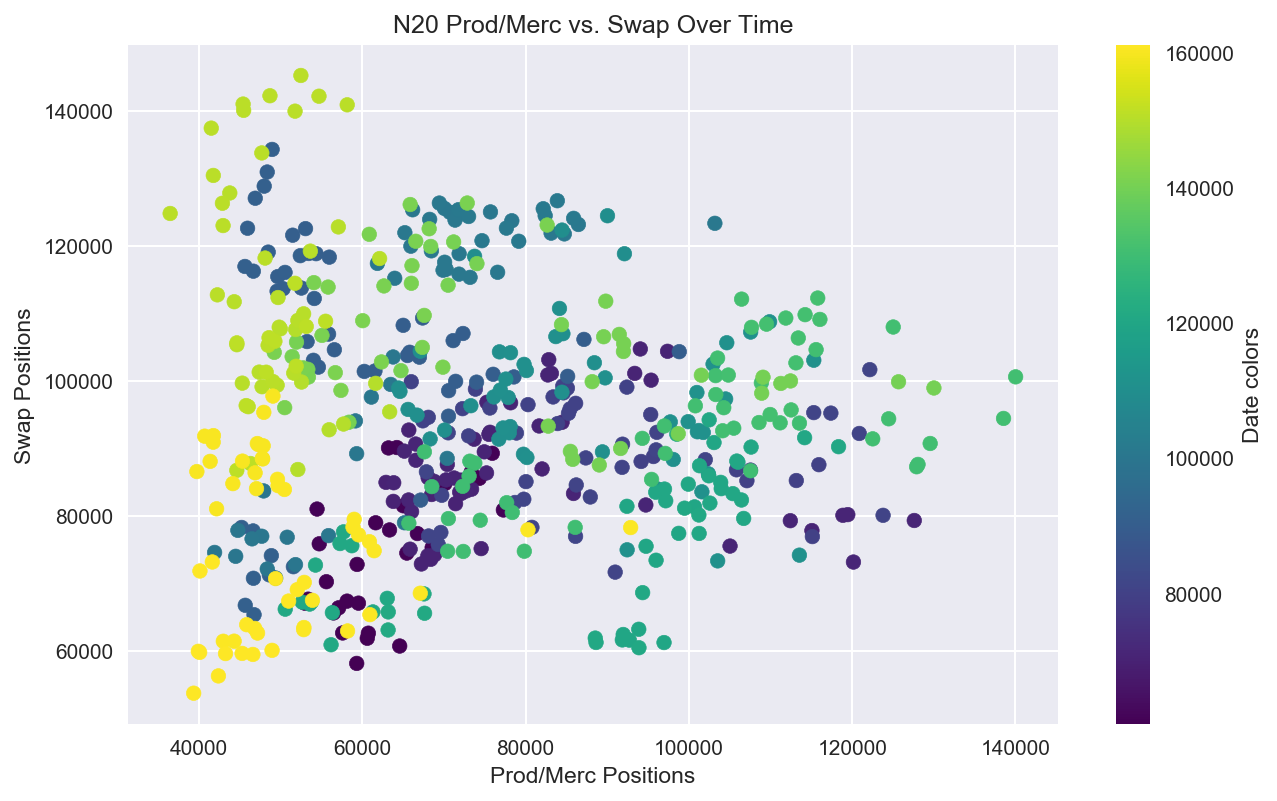

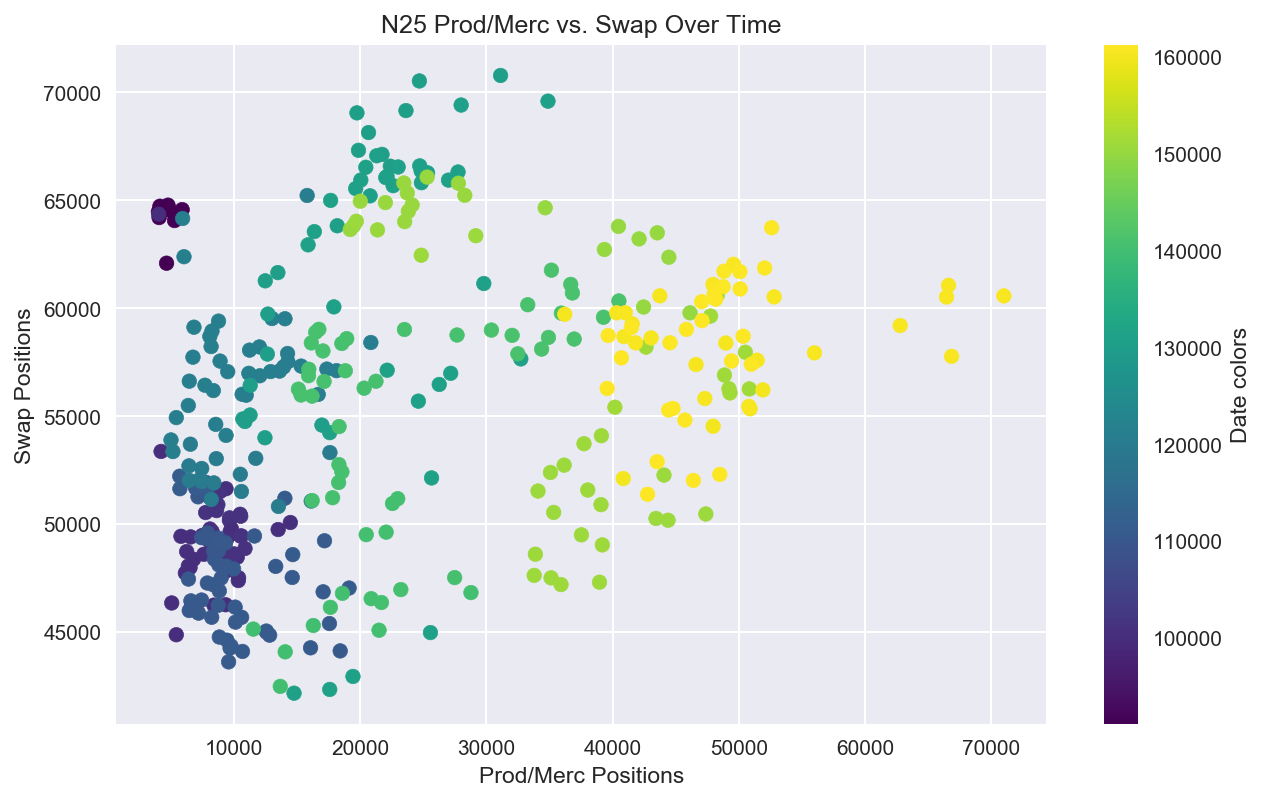

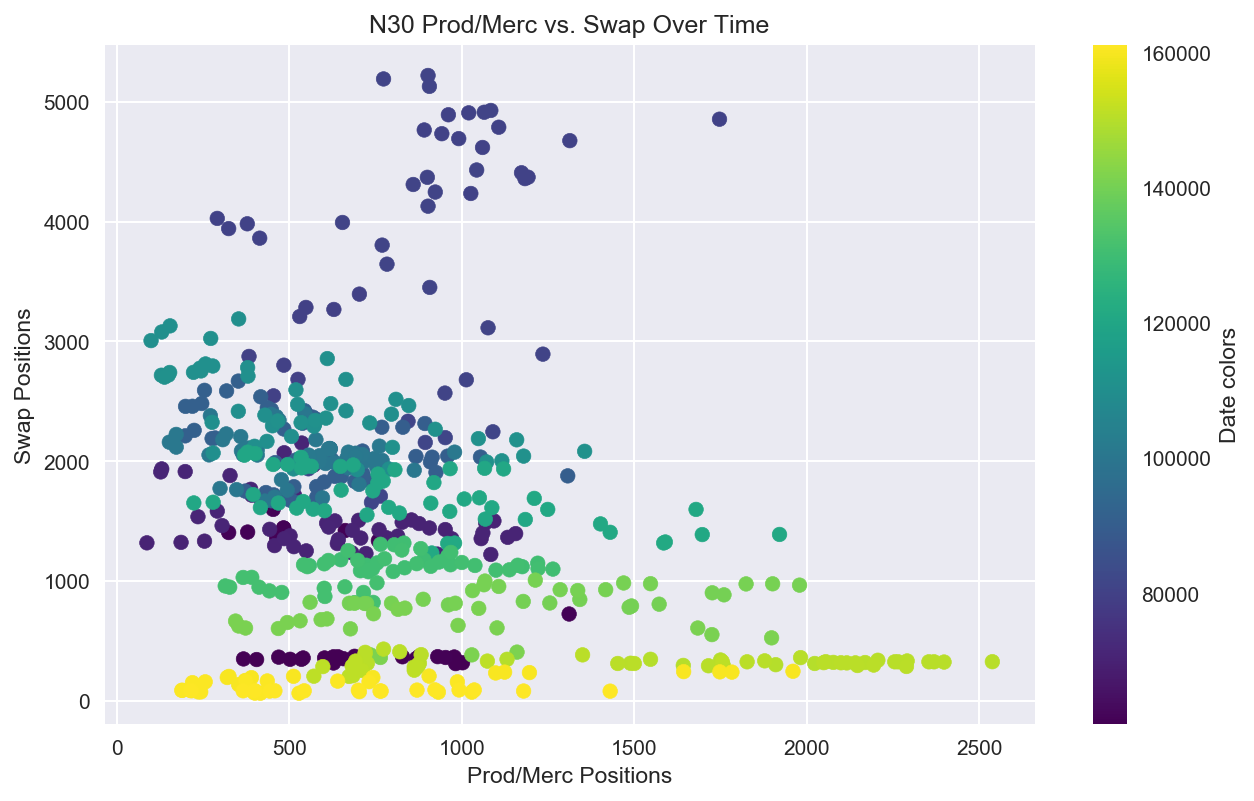

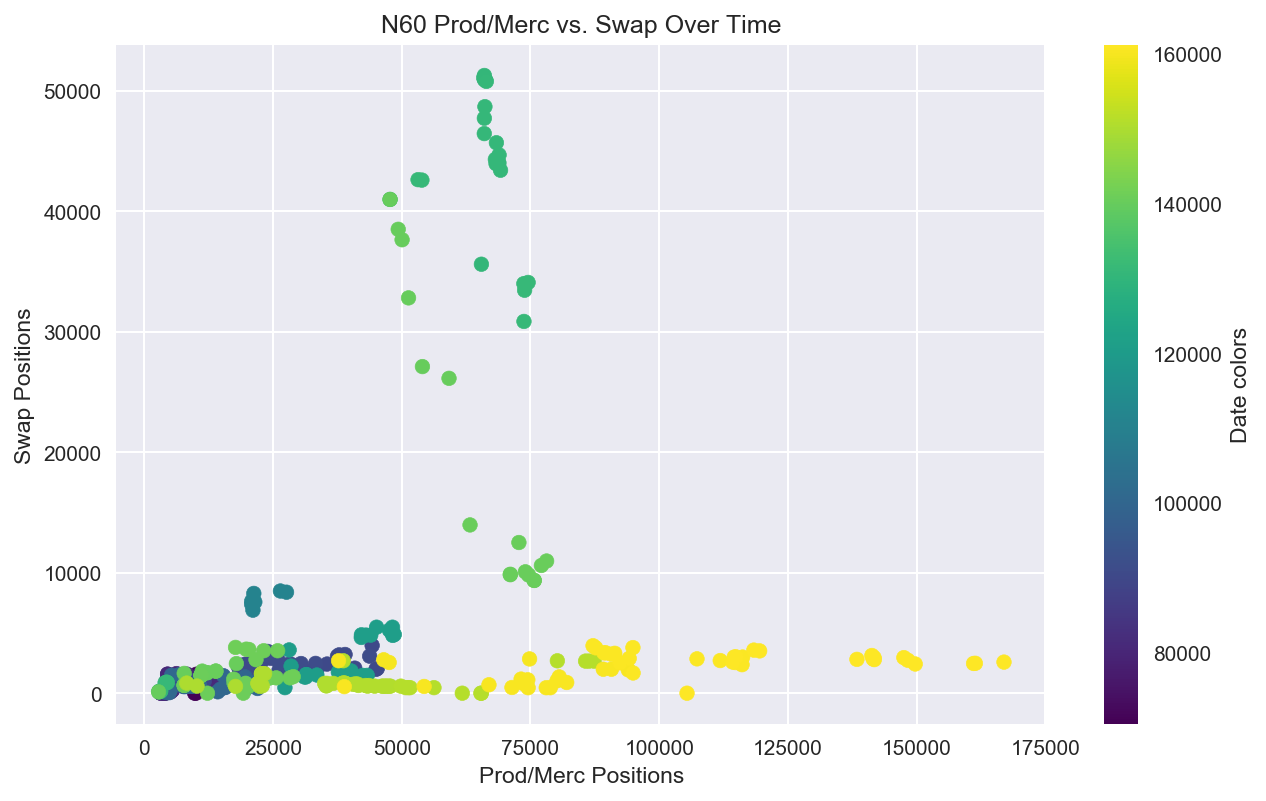

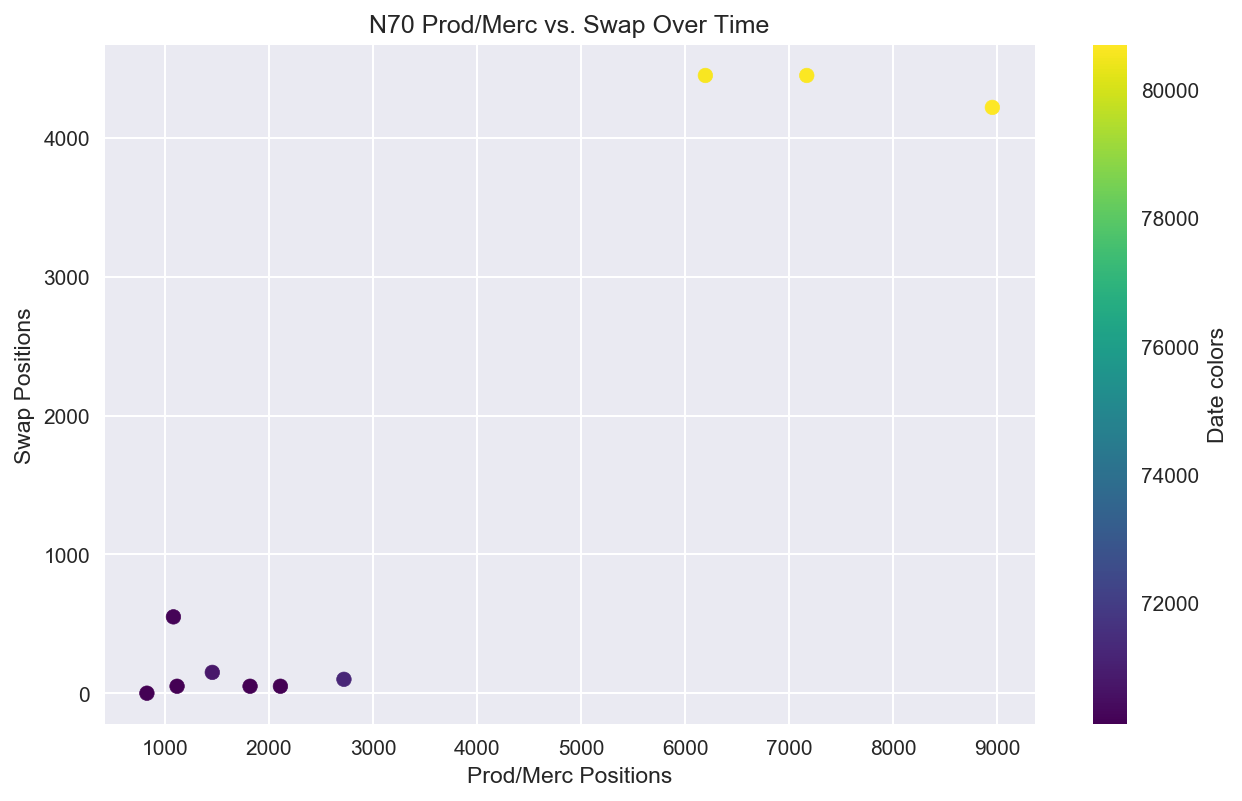

In [26]:
for subgroup_code in sorted(df['CFTC_SubGroup_Code'].unique()):
    subgroup = df[df['CFTC_SubGroup_Code'] == subgroup_code]
    by_date = subgroup.groupby('date')

    plt.scatter(by_date['Prod_Merc_Positions_Long_All'].sum(), 
                by_date['Swap_Positions_Long_All'].sum(),
                c=subgroup['As_of_Date_In_Form_YYMMDD'].unique(),
                cmap='viridis')
    plt.colorbar().set_label('Date colors')
    plt.title(subgroup_code + ' Prod/Merc vs. Swap Over Time')
    plt.xlabel('Prod/Merc Positions')
    plt.ylabel('Swap Positions')
    plt.show()


## Cross Comparisons: How do different subgroups relate?

In [27]:
def cross_compare(subgroup_code_1, subgroup_code_2):
    subgroup_1 = df[(df['CFTC_SubGroup_Code'] == subgroup_code_1)]
    subgroup_1_by_date = subgroup_1.groupby(['date'])

    subgroup_2 = df[(df['CFTC_SubGroup_Code'] == subgroup_code_2)]
    subgroup_2_by_date = subgroup_2.groupby(['date'])

    plt.scatter(subgroup_1_by_date['Prod_Merc_Positions_Long_All'].sum(),
                subgroup_2_by_date['Prod_Merc_Positions_Long_All'].sum(),
                alpha = 0.8,
                label = 'Prod/Merc Positions')

    plt.scatter(subgroup_1_by_date['Swap_Positions_Long_All'].sum(),
                subgroup_2_by_date['Swap_Positions_Long_All'].sum(),
                alpha = 0.8,
                label = 'Swap Positions')

    plt.title('Cross-Comparison of ' + subgroup_code_1 + ' and ' + subgroup_code_2)
    plt.xlabel(subgroup_code_1 + ' ' + 'positions')
    plt.ylabel(subgroup_code_2 + ' ' + 'positions')
    plt.legend()

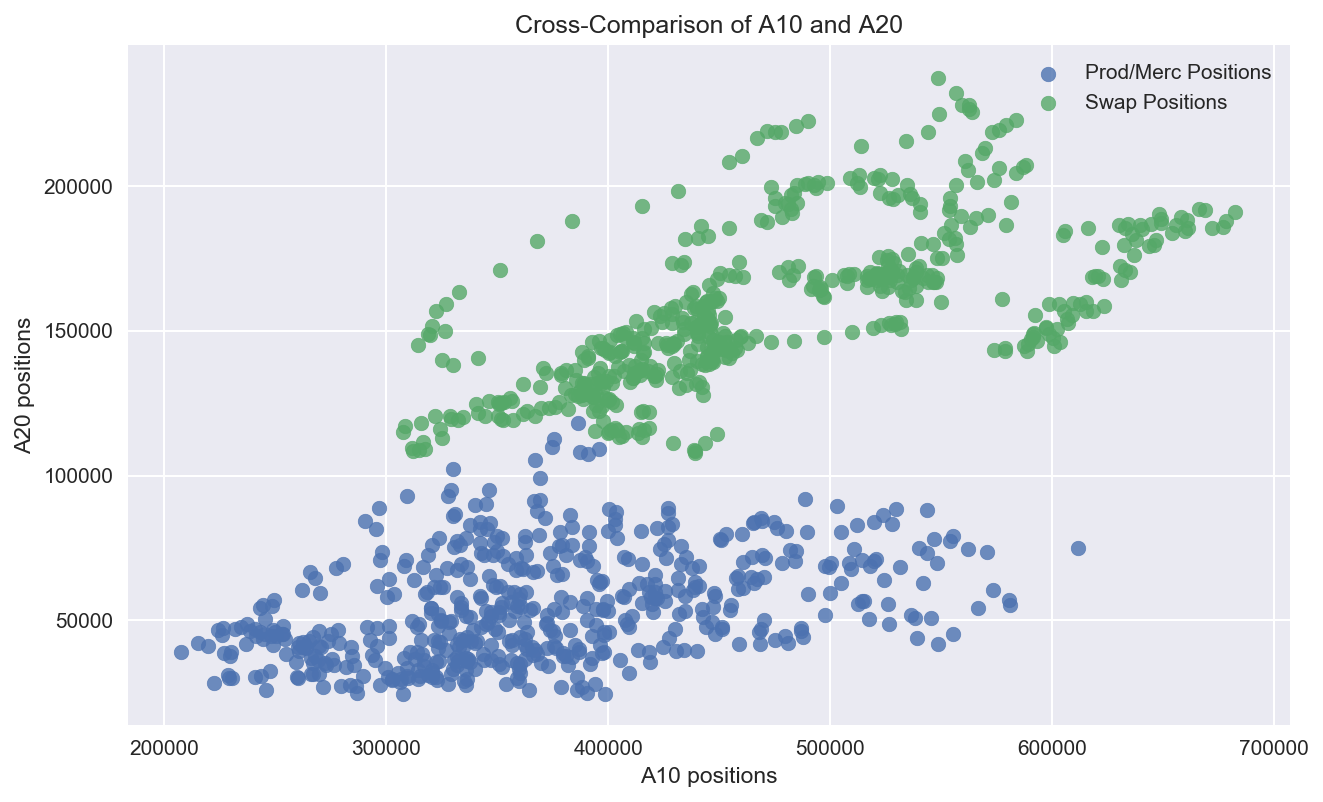

In [28]:
cross_compare('A10', 'A20')

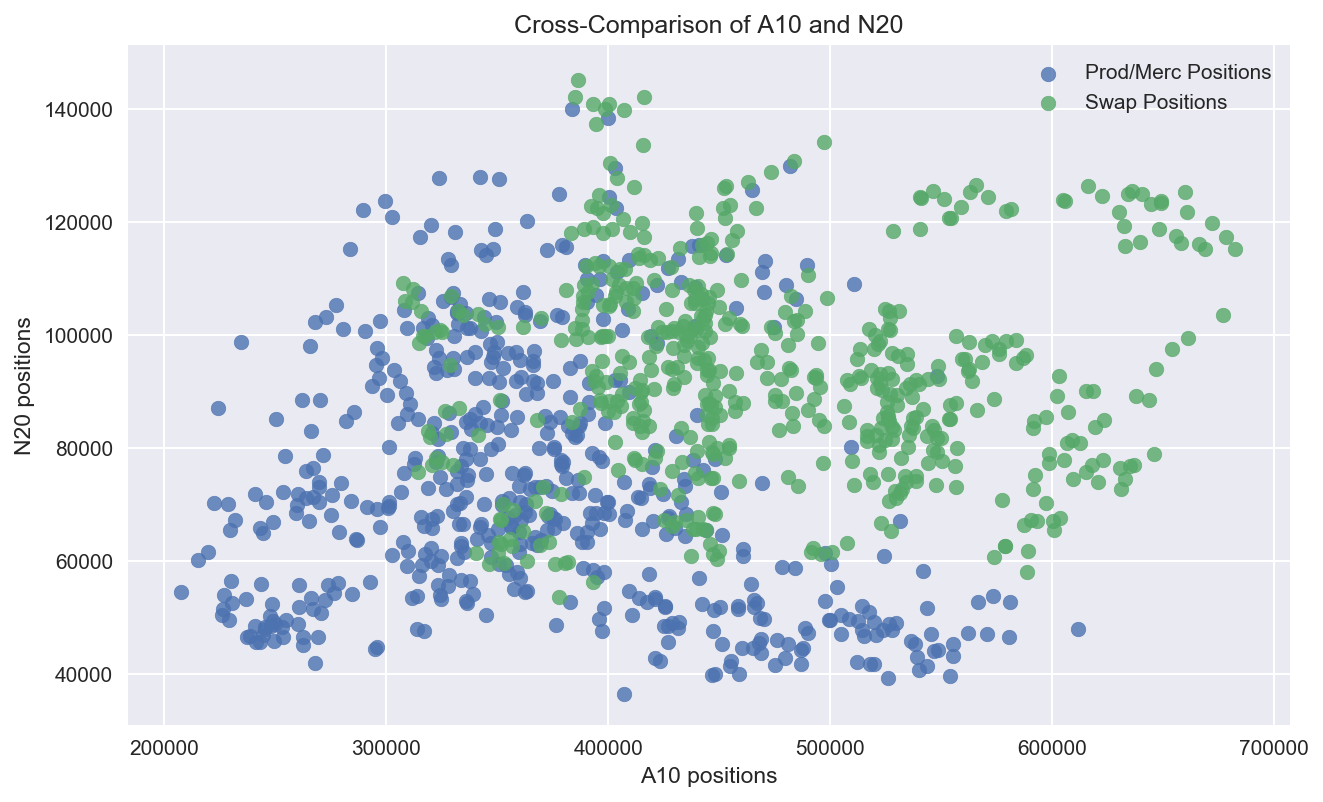

In [29]:
cross_compare('A10', 'N20')

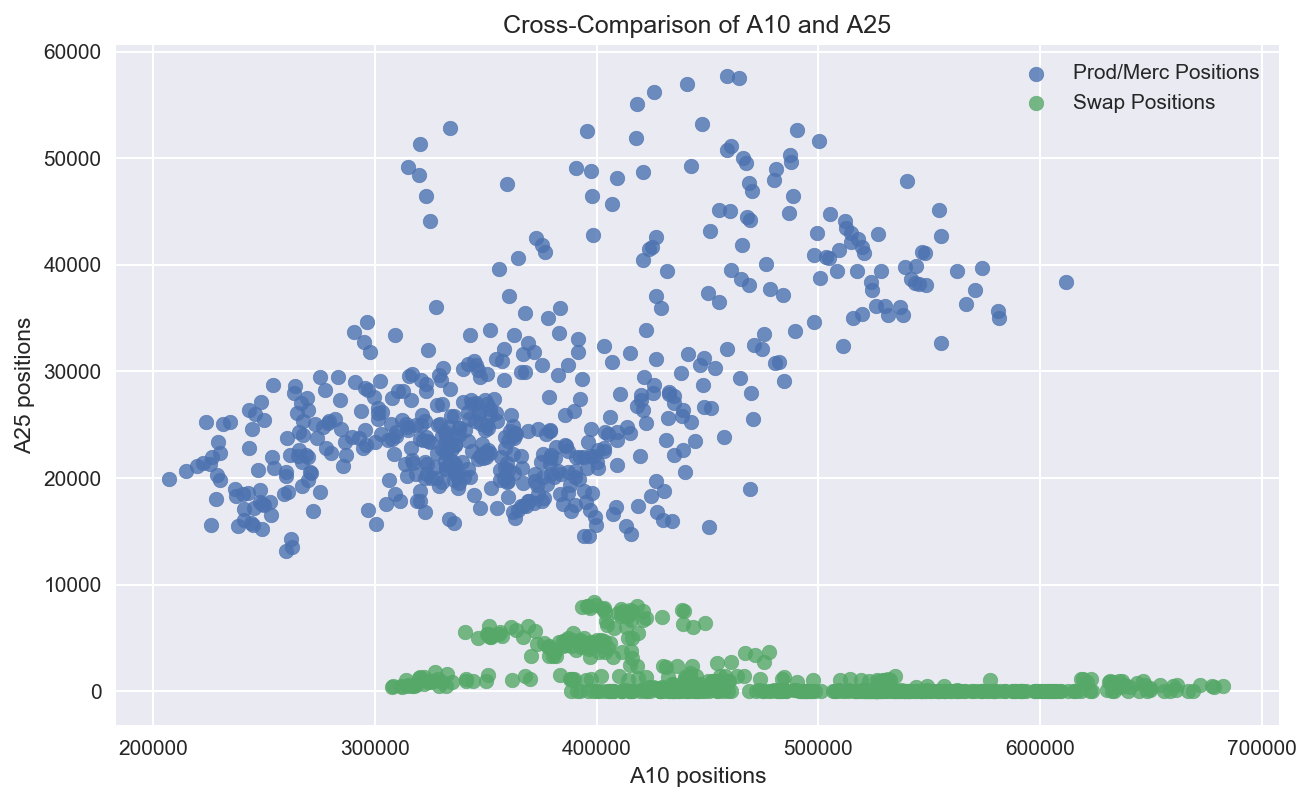

In [30]:
cross_compare('A10', 'A25')

TODO: 
- Investigate linear fit for cross-comparisons
- Split data into discreet time segments
- Investigate linear fits of discreet time segments